In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format 

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set_theme(style='whitegrid')

In [2]:
data = pd.read_csv("lc_loan.csv")

In [3]:
data.shape

(887379, 74)

In [4]:
data.duplicated().sum()

np.int64(0)

# Target Variable

In [5]:
data = data.loc[data['loan_status'].isin(['Fully Paid', 'Charged Off'])]
data.shape

(252971, 74)

In [6]:
data['loan_status'].value_counts()

loan_status
Fully Paid     207723
Charged Off     45248
Name: count, dtype: int64

In [7]:
data['loan_status'].value_counts(normalize=True, dropna=False)

loan_status
Fully Paid    0.82
Charged Off   0.18
Name: proportion, dtype: float64

In [8]:
# Calculate default rate
total_loans = len(data)
charged_off = (data["loan_status"] == "Charged Off").sum()
default_rate = charged_off / total_loans

print(f"Total Loans: {total_loans}")
print(f"Charged Off Loans: {charged_off}")
print(f"Default Rate: {default_rate:.2%}")


Total Loans: 252971
Charged Off Loans: 45248
Default Rate: 17.89%


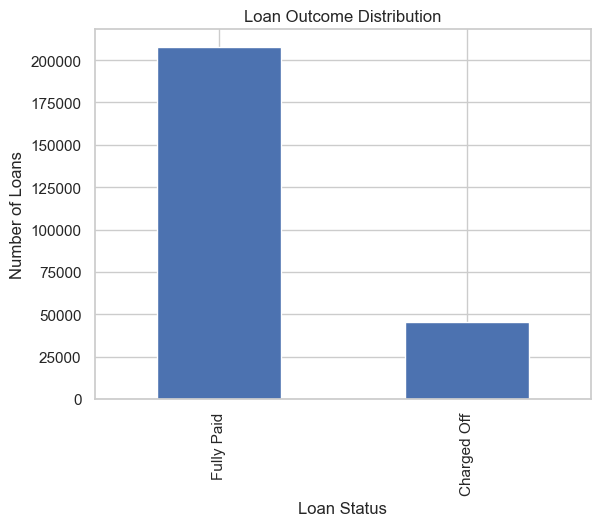

In [9]:
# Count plot
data["loan_status"].value_counts().plot(kind="bar")
plt.title("Loan Outcome Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Number of Loans")
plt.show()


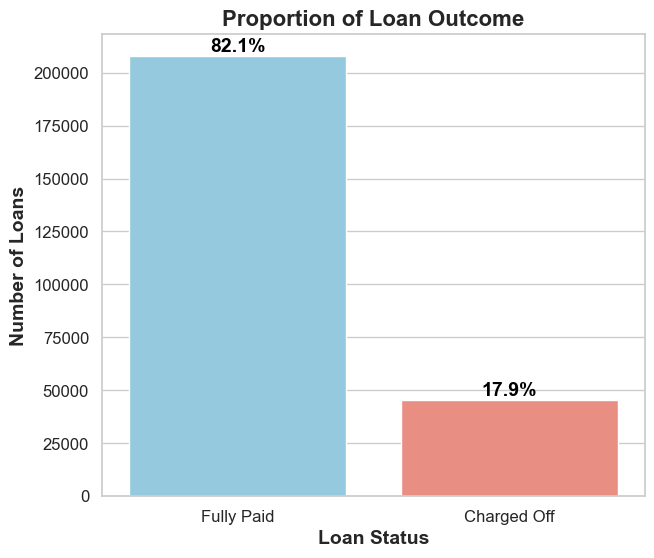

In [10]:
# Prepare counts and percentages
loan_counts = data["loan_status"].value_counts().reset_index()
loan_counts.columns = ["loan_status", "count"]
loan_counts["percent"] = loan_counts["count"] / loan_counts["count"].sum() * 100

# Plot
plt.figure(figsize=(7,6))
ax = sns.barplot(x="loan_status", y="count", data=loan_counts, palette=["skyblue", "salmon"])

# Add only percentages on top of bars
for i, row in loan_counts.iterrows():
    ax.text(i, row["count"] + 2000, f"{row['percent']:.1f}%", 
            ha='center', fontweight='bold', fontsize=14, color='black')

# Bold title and labels
plt.title("Proportion of Loan Outcome", fontsize=16, fontweight='bold')
plt.xlabel("Loan Status", fontsize=14, fontweight='bold')
plt.ylabel("Number of Loans", fontsize=14, fontweight='bold')

# Bold tick labels
ax.tick_params(axis='x', labelsize=12, labelrotation=0)
ax.tick_params(axis='y', labelsize=12)

plt.show()

#plt.savefig("Desktop/Python/plots/BAR_Loan_status.png", dpi=300, bbox_inches='tight')
#plt.close()

# Section 2: Loan Characteristics

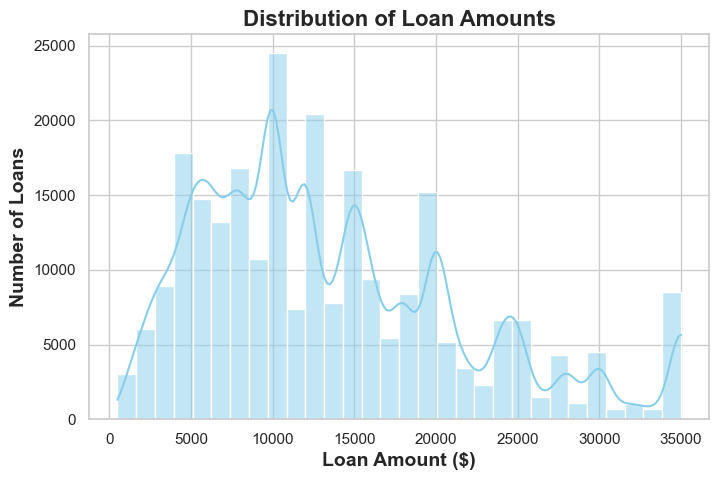

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(data, x="loan_amnt", bins=30, kde=True, color="skyblue")
plt.title("Distribution of Loan Amounts", fontsize=16, fontweight='bold')
plt.xlabel("Loan Amount ($)", fontsize=14, fontweight='bold')
plt.ylabel("Number of Loans", fontsize=14, fontweight='bold')
plt.show()


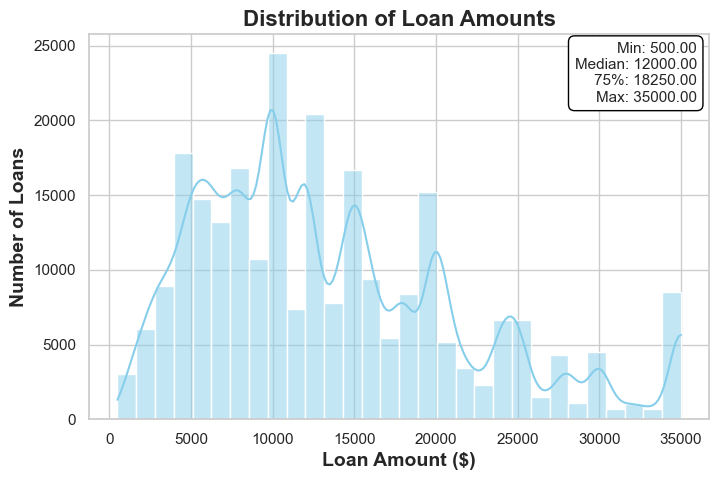

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(data, x="loan_amnt", bins=30, kde=True, color="skyblue")

plt.title("Distribution of Loan Amounts", fontsize=16, fontweight='bold')
plt.xlabel("Loan Amount ($)", fontsize=14, fontweight='bold')
plt.ylabel("Number of Loans", fontsize=14, fontweight='bold')

# Legend-style text box (top-right)
stats_text = (
    "Min: 500.00\n"
    "Median: 12000.00\n"
    "75%: 18250.00\n"
    "Max: 35000.00"
)

plt.text(
    0.98, 0.98, stats_text,
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(boxstyle="round,pad=0.4", facecolor="white", edgecolor="black")
)

plt.show()
#plt.savefig("Desktop/Python/plots/HistLoanAmount.png", dpi=300, bbox_inches='tight')
#plt.close()

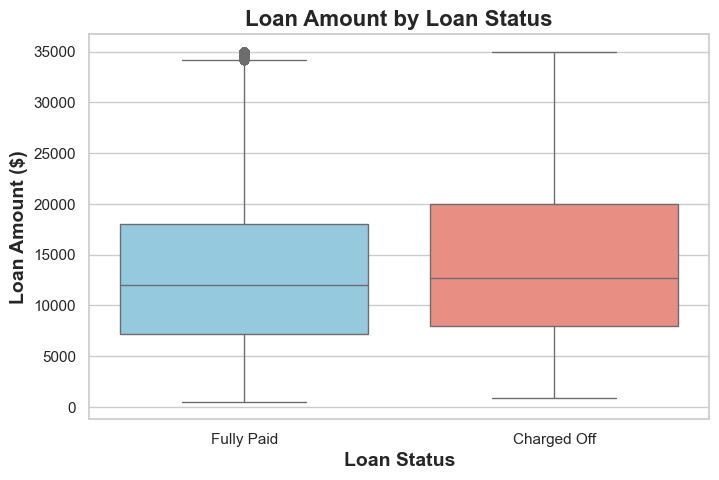

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(x="loan_status", y="loan_amnt", data=data, palette=["skyblue", "salmon"])
plt.title("Loan Amount by Loan Status", fontsize=16, fontweight='bold')
plt.xlabel("Loan Status", fontsize=14, fontweight='bold')
plt.ylabel("Loan Amount ($)", fontsize=14, fontweight='bold')
plt.show()


#plt.savefig("Desktop/Python/plots/LS_by_Loan_status.png", dpi=300, bbox_inches='tight')
#plt.close()

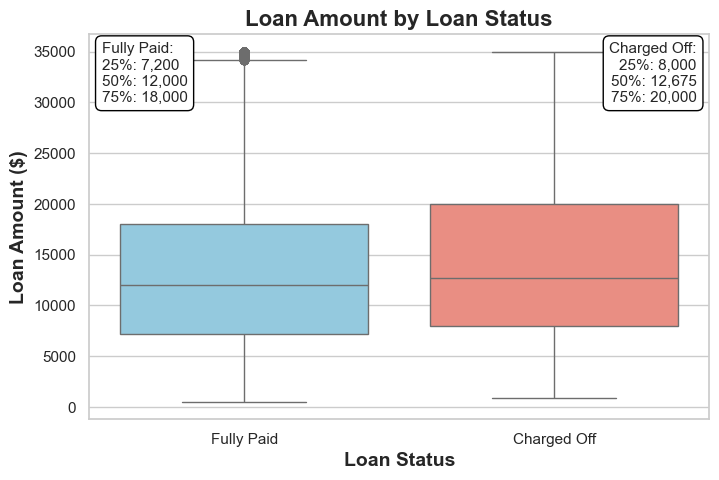

In [14]:
plt.figure(figsize=(8,5))

# Boxplot
sns.boxplot(x="loan_status", y="loan_amnt", data=data, palette=["skyblue", "salmon"])

# Title and labels
plt.title("Loan Amount by Loan Status", fontsize=16, fontweight='bold')
plt.xlabel("Loan Status", fontsize=14, fontweight='bold')
plt.ylabel("Loan Amount ($)", fontsize=14, fontweight='bold')

# Compute Q1, Median, Q3 for each loan_status
stats = data.groupby("loan_status")["loan_amnt"].quantile([0.25, 0.5, 0.75]).unstack()

# Top-left box for Fully Paid
plt.text(
    0.02, 0.98,  # axes coordinates (left margin, top)
    f"Fully Paid:\n25%: {stats.loc['Fully Paid',0.25]:,.0f}\n"
    f"50%: {stats.loc['Fully Paid',0.50]:,.0f}\n"
    f"75%: {stats.loc['Fully Paid',0.75]:,.0f}",
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='top',
    horizontalalignment='left',
    bbox=dict(boxstyle="round,pad=0.4", facecolor="white", edgecolor="black")
)

# Top-right box for Charged Off
plt.text(
    0.98, 0.98,  # axes coordinates (right margin, top)
    f"Charged Off:\n25%: {stats.loc['Charged Off',0.25]:,.0f}\n"
    f"50%: {stats.loc['Charged Off',0.50]:,.0f}\n"
    f"75%: {stats.loc['Charged Off',0.75]:,.0f}",
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(boxstyle="round,pad=0.4", facecolor="white", edgecolor="black")
)

plt.show()


#plt.savefig("Desktop/Python/plots/LS_by_Loan_status.png", dpi=300, bbox_inches='tight')
#plt.close()

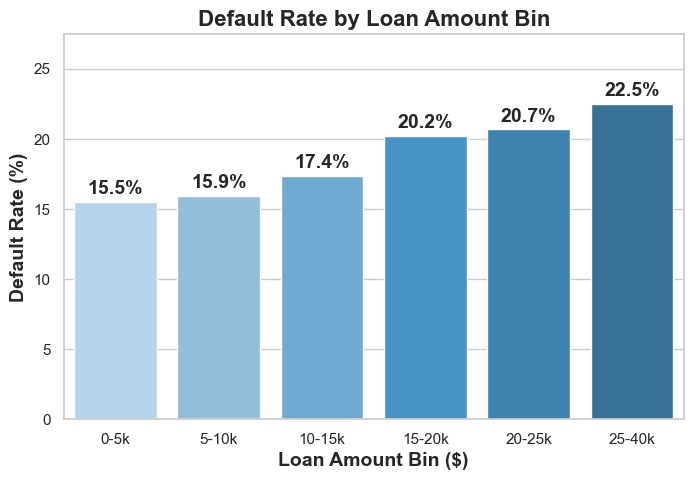

In [15]:
# Create bins for loan amounts
data['loan_amnt_bin'] = pd.cut(
    data['loan_amnt'],
    bins=[0,5000,10000,15000,20000,25000,40000],
    labels=['0-5k','5-10k','10-15k','15-20k','20-25k','25-40k']
)

# Calculate default %
loan_bin_default = data.groupby('loan_amnt_bin')['loan_status'] \
    .apply(lambda x: (x == 'Charged Off').mean() * 100)

# Plot
plt.figure(figsize=(8,5))
colors = ["#AED6F1", "#85C1E9", "#5DADE2", "#3498DB", "#2E86C1", "#2874A6"]
ax = sns.barplot(
    x=loan_bin_default.index,
    y=loan_bin_default.values,
    palette=colors
)

plt.title("Default Rate by Loan Amount Bin", fontsize=16, fontweight='bold')
plt.xlabel("Loan Amount Bin ($)", fontsize=14, fontweight='bold')
plt.ylabel("Default Rate (%)", fontsize=14, fontweight='bold')
plt.ylim(0, max(loan_bin_default.values) + 5)

# Add percentage labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3, fontsize=14, fontweight = 'bold')

plt.show()


#plt.savefig("Desktop/Python/plots/LoanAmountBin.png", dpi=300, bbox_inches='tight')
#plt.close()

### This chart shows the default rate (Charged Off loans) across different loan amount bins…
the chart indicates that loan amount has a moderate impact on default risk: mid-sized to higher ranges loans are more prone to default, while very small loans are safer. This helps in understanding how the size of a loan influences borrower behavior and can guide lending strategies or risk assessments.

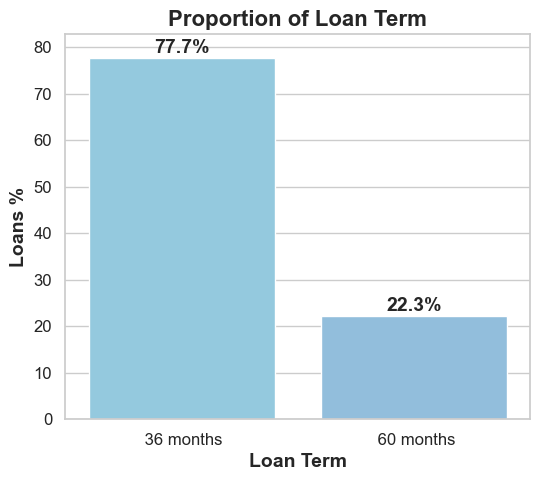

In [16]:
# Calculate percentage of each term
term_counts = data['term'].value_counts(normalize=True).reset_index()
term_counts.columns = ['term', 'percent']
term_counts['percent'] *= 100  # convert to percentage

# Plot
plt.figure(figsize=(6,5))
ax = sns.barplot(x='term', y='percent', data=term_counts, palette=["skyblue", "#85C1E9"])

# Add percentages on top
for i, val in enumerate(term_counts['percent']):
    ax.text(i, val + 1, f"{val:.1f}%", ha='center', fontweight='bold', fontsize=14)

# Titles and labels
plt.title("Proportion of Loan Term", fontsize=16, fontweight='bold')
plt.xlabel("Loan Term", fontsize=14, fontweight='bold')
plt.ylabel("Loans %", fontsize=14, fontweight='bold')

# Bold tick labels
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)


plt.ylim(0, max(term_counts['percent']) + 5)
plt.show()

#plt.savefig("Desktop/Python/plots/Term_1.png", dpi=300, bbox_inches='tight')
#plt.close()

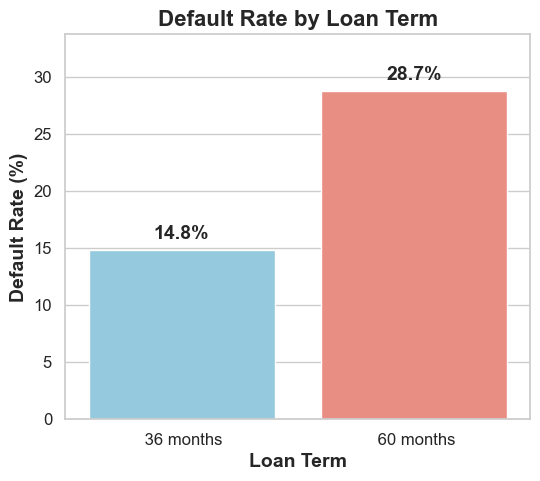

In [17]:
# Calculate default rate by term
term_default = data.groupby("term")["loan_status"].apply(lambda x: (x=="Charged Off").mean()*100)

# Plot
plt.figure(figsize=(6,5))
ax = sns.barplot(x=term_default.index, y=term_default.values, palette=["skyblue","salmon"])

# Add percentages on top
for i, val in enumerate(term_default.values):
    ax.text(i, val + 1, f"{val:.1f}%", ha='center', fontweight='bold', fontsize=14)

# Titles and labels in bold
plt.title("Default Rate by Loan Term", fontsize=16, fontweight='bold')
plt.xlabel("Loan Term", fontsize=14, fontweight='bold')
plt.ylabel("Default Rate (%)", fontsize=14, fontweight='bold')

# Bold tick labels
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.ylim(0, max(term_default.values)+5)
plt.show()
#plt.savefig("Desktop/Python/plots/Term_2.png", dpi=300, bbox_inches='tight')
#plt.close()

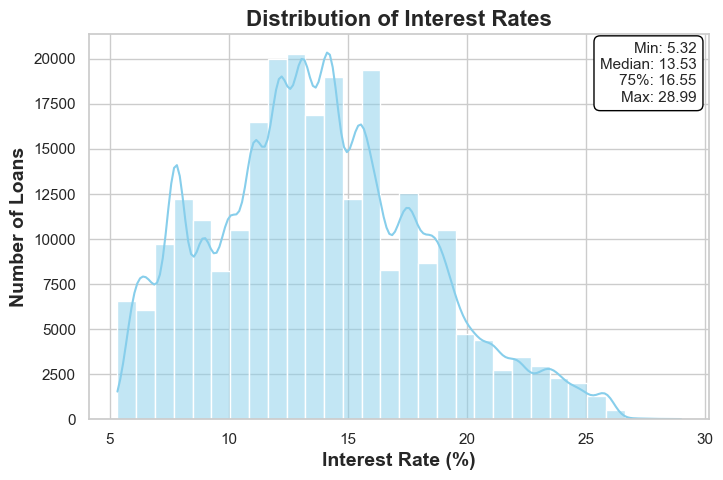

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(data['int_rate'], bins=30, kde=True, color="skyblue")

plt.title("Distribution of Interest Rates", fontsize=16, fontweight='bold')
plt.xlabel("Interest Rate (%)", fontsize=14, fontweight='bold')
plt.ylabel("Number of Loans", fontsize=14, fontweight='bold')

# Legend-style stats box (top-right)
stats_text = (
    "Min: 5.32\n"
    "Median: 13.53\n"
    "75%: 16.55\n"
    "Max: 28.99"
)

plt.text(
    0.98, 0.98, stats_text,
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(boxstyle="round,pad=0.4", facecolor="white", edgecolor="black")
)

plt.show()
#plt.savefig("Desktop/Python/plots/InterestRate.png", dpi=300, bbox_inches='tight')
#plt.close()

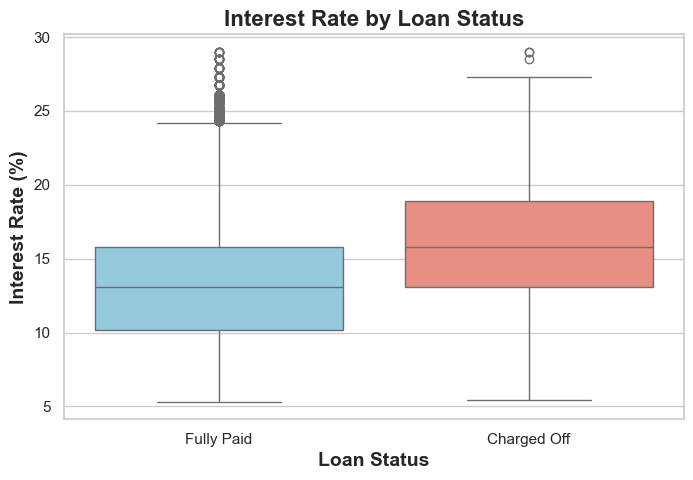

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x='loan_status', y='int_rate', data=data, palette=["skyblue", "salmon"])
plt.title("Interest Rate by Loan Status", fontsize=16, fontweight='bold')
plt.xlabel("Loan Status", fontsize=14, fontweight='bold')
plt.ylabel("Interest Rate (%)", fontsize=14, fontweight='bold')
plt.show()


#plt.savefig("Desktop/Python/plots/LS_by_InterestRate.png", dpi=300, bbox_inches='tight')
#plt.close()

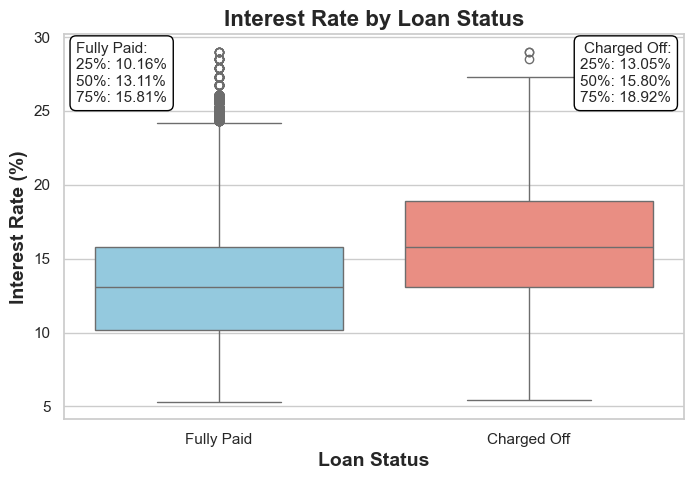

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))

# Boxplot
sns.boxplot(x='loan_status', y='int_rate', data=data, palette=["skyblue", "salmon"])

# Title and labels
plt.title("Interest Rate by Loan Status", fontsize=16, fontweight='bold')
plt.xlabel("Loan Status", fontsize=14, fontweight='bold')
plt.ylabel("Interest Rate (%)", fontsize=14, fontweight='bold')

# Compute Q1, Median, Q3 for each loan_status
stats = data.groupby("loan_status")["int_rate"].quantile([0.25, 0.5, 0.75]).unstack()

# Top-left box for Fully Paid
plt.text(
    0.02, 0.98,  # axes coordinates (left margin, top)
    f"Fully Paid:\n25%: {stats.loc['Fully Paid',0.25]:.2f}%\n"
    f"50%: {stats.loc['Fully Paid',0.50]:.2f}%\n"
    f"75%: {stats.loc['Fully Paid',0.75]:.2f}%",
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='top',
    horizontalalignment='left',
    bbox=dict(boxstyle="round,pad=0.4", facecolor="white", edgecolor="black")
)

# Top-right box for Charged Off
plt.text(
    0.98, 0.98,  # axes coordinates (right margin, top)
    f"Charged Off:\n25%: {stats.loc['Charged Off',0.25]:.2f}%\n"
    f"50%: {stats.loc['Charged Off',0.50]:.2f}%\n"
    f"75%: {stats.loc['Charged Off',0.75]:.2f}%",
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(boxstyle="round,pad=0.4", facecolor="white", edgecolor="black")
)

plt.show()

#plt.savefig("Desktop/Python/plots/LS_by_InterestRate.png", dpi=300, bbox_inches='tight')
#plt.close()

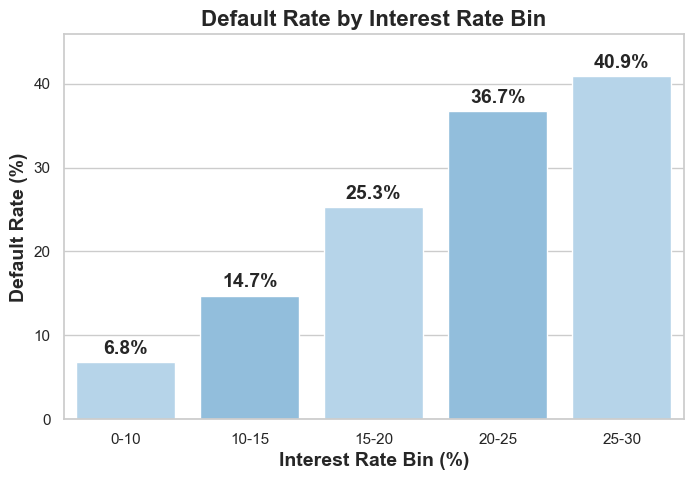

In [20]:
# Create interest rate bins
data['int_rate_bin'] = pd.cut(data['int_rate'], bins=[0, 10, 15, 20, 25, 30], labels=['0-10','10-15','15-20','20-25','25-30'])

# Default rate per bin
int_rate_default = data.groupby('int_rate_bin')['loan_status'].apply(lambda x: (x=='Charged Off').mean()*100)

# Plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x=int_rate_default.index, y=int_rate_default.values, palette=["#AED6F1","#85C1E9","#AED6F1","#85C1E9","#AED6F1"])

# Percentages on top
for i, val in enumerate(int_rate_default.values):
    ax.text(i, val + 1, f"{val:.1f}%", ha='center', fontweight='bold', fontsize=14)

plt.title("Default Rate by Interest Rate Bin", fontsize=16, fontweight='bold')
plt.xlabel("Interest Rate Bin (%)", fontsize=14, fontweight='bold')
plt.ylabel("Default Rate (%)", fontsize=14, fontweight='bold')
plt.ylim(0, max(int_rate_default.values)+5)

plt.show()
#plt.savefig("Desktop/Python/plots/InterestRate_Bin.png", dpi=300, bbox_inches='tight')
#plt.close()

### Shows strong positive relationship between interest rate and default risk

installment, which is the monthly payment for each loan. This is important because higher monthly payments may increase default risk, especially for financially stretched borrowers.

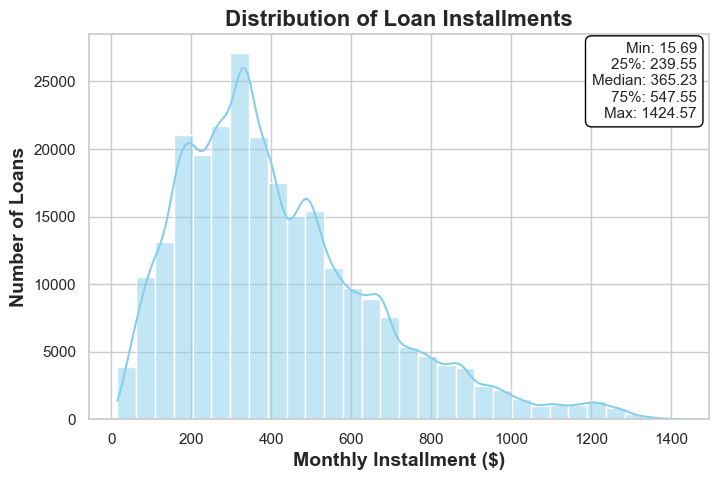

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(data['installment'], bins=30, kde=True, color="skyblue")

plt.title("Distribution of Loan Installments", fontsize=16, fontweight='bold')
plt.xlabel("Monthly Installment ($)", fontsize=14, fontweight='bold')
plt.ylabel("Number of Loans", fontsize=14, fontweight='bold')

# Legend-style stats box (top-right)
stats_text = (
    "Min: 15.69\n"
    "25%: 239.55\n"
    "Median: 365.23\n"
    "75%: 547.55\n"
    "Max: 1424.57"
)

plt.text(
    0.98, 0.98, stats_text,
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(boxstyle="round,pad=0.4", facecolor="white", edgecolor="black")
)

plt.show()


#plt.savefig("Desktop/Python/plots/Installment_1.png", dpi=300, bbox_inches='tight')
#plt.close()

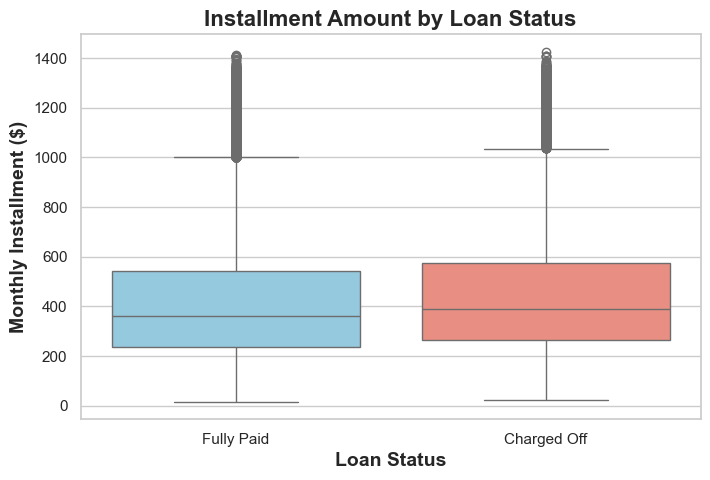

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x='loan_status', y='installment', data=data, palette=["skyblue", "salmon"])
plt.title("Installment Amount by Loan Status", fontsize=16, fontweight='bold')
plt.xlabel("Loan Status", fontsize=14, fontweight='bold')
plt.ylabel("Monthly Installment ($)", fontsize=14, fontweight='bold')
plt.show()

#plt.savefig("Desktop/Python/plots/Installment_2.png", dpi=300, bbox_inches='tight')
#plt.close()

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))

# Boxplot
sns.boxplot(x='loan_status', y='installment', data=data, palette=["skyblue", "salmon"])

# Title and labels
plt.title("Installment Amount by Loan Status", fontsize=16, fontweight='bold')
plt.xlabel("Loan Status", fontsize=14, fontweight='bold')
plt.ylabel("Monthly Installment ($)", fontsize=14, fontweight='bold')

# Compute Q1, Median, Q3 for each loan_status
stats = data.groupby("loan_status")["installment"].quantile([0.25, 0.5, 0.75]).unstack()

# Top-left box for Fully Paid
plt.text(
    0.02, 0.98,  # axes coordinates (left margin, top)
    f"Fully Paid:\n25%: ${stats.loc['Fully Paid',0.25]:,.2f}\n"
    f"50%: ${stats.loc['Fully Paid',0.50]:,.2f}\n"
    f"75%: ${stats.loc['Fully Paid',0.75]:,.2f}",
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='top',
    horizontalalignment='left',
    bbox=dict(boxstyle="round,pad=0.4", facecolor="white", edgecolor="black")
)

# Top-right box for Charged Off
plt.text(
    0.98, 0.98,  # axes coordinates (right margin, top)
    f"Charged Off:\n25%: ${stats.loc['Charged Off',0.25]:,.2f}\n"
    f"50%: ${stats.loc['Charged Off',0.50]:,.2f}\n"
    f"75%: ${stats.loc['Charged Off',0.75]:,.2f}",
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(boxstyle="round,pad=0.4", facecolor="white", edgecolor="black")
)

plt.savefig("Desktop/Python/plots/Installment_2.png", dpi=300, bbox_inches='tight')
plt.close()

# Secction 3: Borrower Financial Strength.
These variables capture the financial health of the borrower,

3.1 Anuual Income

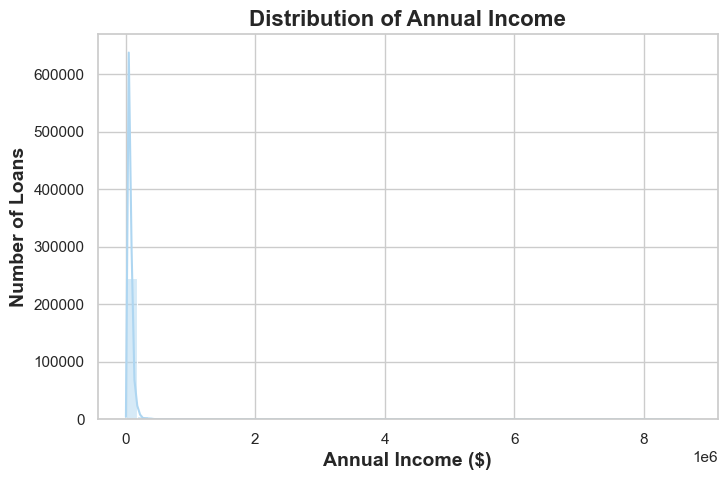

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(data['annual_inc'], bins=50, kde=True, color="#AED6F1")  # log1p handles zeros
plt.title("Distribution of Annual Income", fontsize=16, fontweight='bold')
plt.xlabel("Annual Income ($)", fontsize=14, fontweight='bold')
plt.ylabel("Number of Loans", fontsize=14, fontweight='bold')
plt.show()

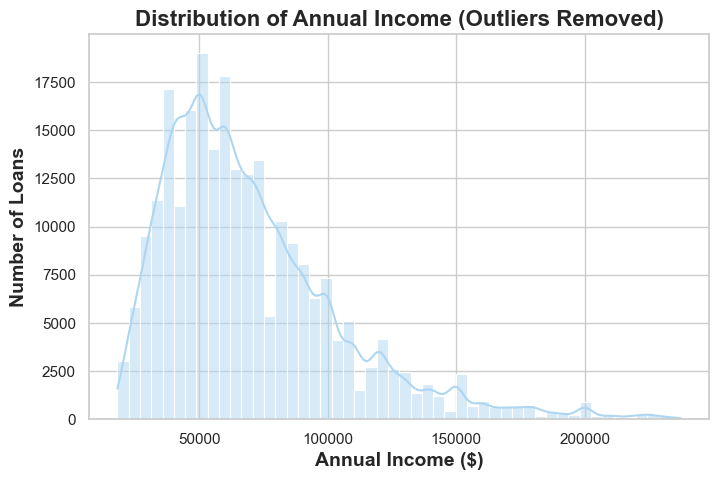

In [29]:
# Remove extreme outliers using 1st and 99th percentiles
lower = data['annual_inc'].quantile(0.01)
upper = data['annual_inc'].quantile(0.99)
filtered_data = data[(data['annual_inc'] >= lower) & (data['annual_inc'] <= upper)]

# Plot
plt.figure(figsize=(8,5))
sns.histplot(filtered_data['annual_inc'], bins=50, kde=True, color="#AED6F1")
plt.title("Distribution of Annual Income (Outliers Removed)", fontsize=16, fontweight='bold')
plt.xlabel("Annual Income ($)", fontsize=14, fontweight='bold')
plt.ylabel("Number of Loans", fontsize=14, fontweight='bold')
plt.show()


In [30]:
data['annual_inc'].describe()

count    252971.00
mean      72538.25
std       58811.81
min        3000.00
25%       45000.00
50%       62000.00
75%       87000.00
max     8706582.00
Name: annual_inc, dtype: float64

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove extreme outliers using 1st and 99th percentiles
lower = data['annual_inc'].quantile(0.01)
upper = data['annual_inc'].quantile(0.99)
filtered_data = data[(data['annual_inc'] >= lower) & (data['annual_inc'] <= upper)]

# Plot
plt.figure(figsize=(8,5))
sns.histplot(filtered_data['annual_inc'], bins=50, kde=True, color="#AED6F1")
plt.title("Distribution of Annual Income (Outliers Removed)", fontsize=16, fontweight='bold')
plt.xlabel("Annual Income ($)", fontsize=14, fontweight='bold')
plt.ylabel("Number of Loans", fontsize=14, fontweight='bold')

# Legend box with stats (top-right corner)
stats_text = (
    "min: 3,000.00\n"
    "50%: 62,000.00\n"
    "75%: 87,000.00\n"
    "max: 8,706,582.00"
)

plt.text(
    0.98, 0.98,  # axes coordinates (top-right)
    stats_text,
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(boxstyle="round,pad=0.4", facecolor="white", edgecolor="black")
)


plt.savefig("Desktop/Python/plots/Income_1.png", dpi=300, bbox_inches='tight')
plt.close()

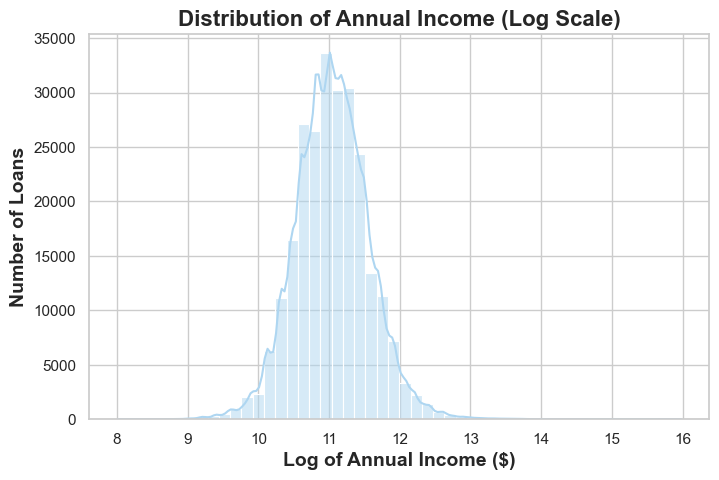

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(np.log1p(data['annual_inc']), bins=50, kde=True, color="#AED6F1")  # log1p handles zeros
plt.title("Distribution of Annual Income (Log Scale)", fontsize=16, fontweight='bold')
plt.xlabel("Log of Annual Income ($)", fontsize=14, fontweight='bold')
plt.ylabel("Number of Loans", fontsize=14, fontweight='bold')
plt.show()


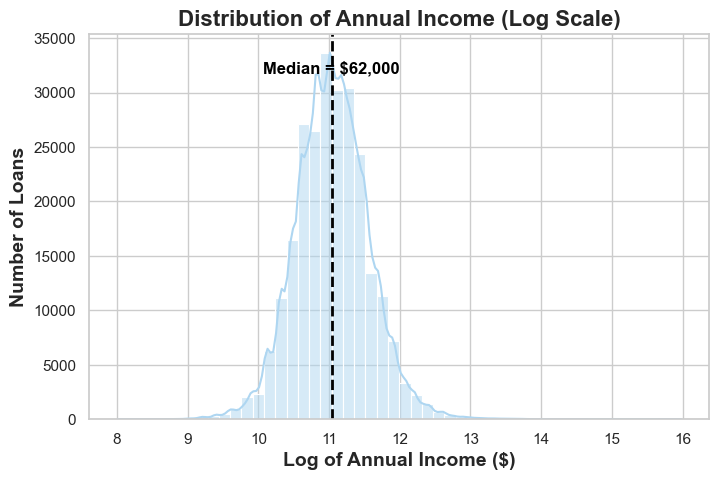

In [24]:
# Calculate median
median_income = data["annual_inc"].median()

# Convert median to log scale (because the plot is log-transformed)
log_median = np.log1p(median_income)

plt.figure(figsize=(8,5))
ax = sns.histplot(np.log1p(data['annual_inc']), bins=50, kde=True, color="#AED6F1")

# Add vertical median line
plt.axvline(log_median, color='black', linestyle='--', linewidth=2)

# Add median label
plt.text(log_median, plt.ylim()[1]*0.9, 
         f"Median = ${median_income:,.0f}", 
         ha='center', fontweight='bold', fontsize=12, color='black')

# Titles and labels
plt.title("Distribution of Annual Income (Log Scale)", fontsize=16, fontweight='bold')
plt.xlabel("Log of Annual Income ($)", fontsize=14, fontweight='bold')
plt.ylabel("Number of Loans", fontsize=14, fontweight='bold')

plt.show()


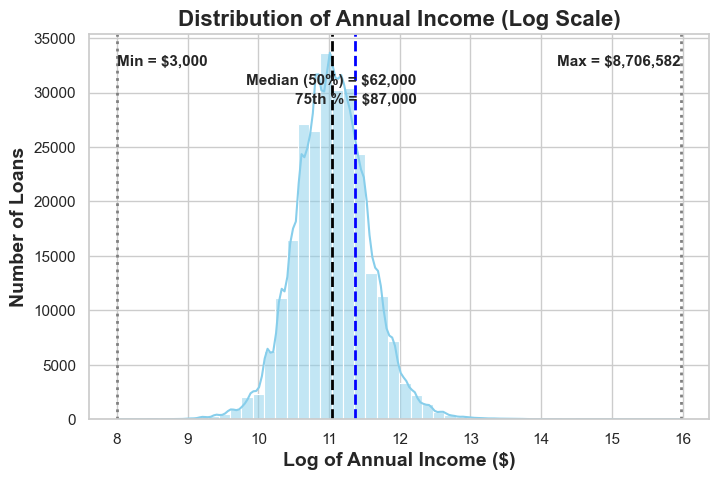

In [25]:
# Given values
min_income = 3000
median_income = 62000
p75_income = 87000
max_income = 8706582

# Convert to log scale
log_min = np.log1p(min_income)
log_median = np.log1p(median_income)
log_p75 = np.log1p(p75_income)
log_max = np.log1p(max_income)

plt.figure(figsize=(8,5))
ax = sns.histplot(np.log1p(data['annual_inc']), bins=50, kde=True, color="skyblue")

# Vertical reference lines
plt.axvline(log_min, color='gray', linestyle=':', linewidth=2)
plt.axvline(log_median, color='black', linestyle='--', linewidth=2)
plt.axvline(log_p75, color='blue', linestyle='--', linewidth=2)
plt.axvline(log_max, color='gray', linestyle=':', linewidth=2)

# Y limit reference
y_max = plt.ylim()[1]

# Labels
plt.text(log_min, y_max*0.92, "Min = $3,000", ha='left', fontweight='bold', fontsize=11)

plt.text(log_median, y_max*0.87, f"Median (50%) = ${median_income:,.0f}", 
         ha='center', fontweight='bold', fontsize=11)

plt.text(log_p75, y_max*0.82, f"75th % = ${p75_income:,.0f}", 
         ha='center', fontweight='bold', fontsize=11)

plt.text(log_max, y_max*0.92, f"Max = ${max_income:,.0f}", 
         ha='right', fontweight='bold', fontsize=11)

# Titles and labels
plt.title("Distribution of Annual Income (Log Scale)", fontsize=16, fontweight='bold')
plt.xlabel("Log of Annual Income ($)", fontsize=14, fontweight='bold')
plt.ylabel("Number of Loans", fontsize=14, fontweight='bold')

plt.show()

#plt.savefig("Desktop/Python/plots/Income_1.png", dpi=300, bbox_inches='tight')
#plt.close()

In [26]:
data['annual_inc'].describe()

count    252971.00
mean      72538.25
std       58811.81
min        3000.00
25%       45000.00
50%       62000.00
75%       87000.00
max     8706582.00
Name: annual_inc, dtype: float64

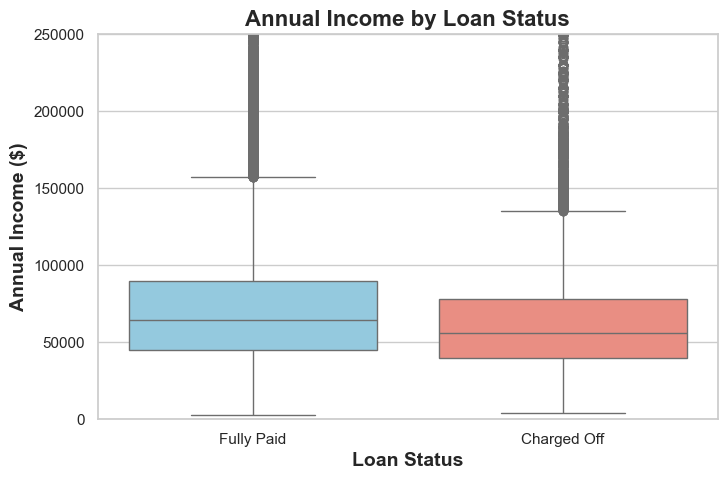

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(x='loan_status', y='annual_inc', data=data, palette=["skyblue", "salmon"])
plt.title("Annual Income by Loan Status", fontsize=16, fontweight='bold')
plt.xlabel("Loan Status", fontsize=14, fontweight='bold')
plt.ylabel("Annual Income ($)", fontsize=14, fontweight='bold')
plt.ylim(0, 250000)  # focus on main range
plt.show()
#plt.savefig("Desktop/Python/plots/Income_2.png", dpi=300, bbox_inches='tight')
#plt.close()

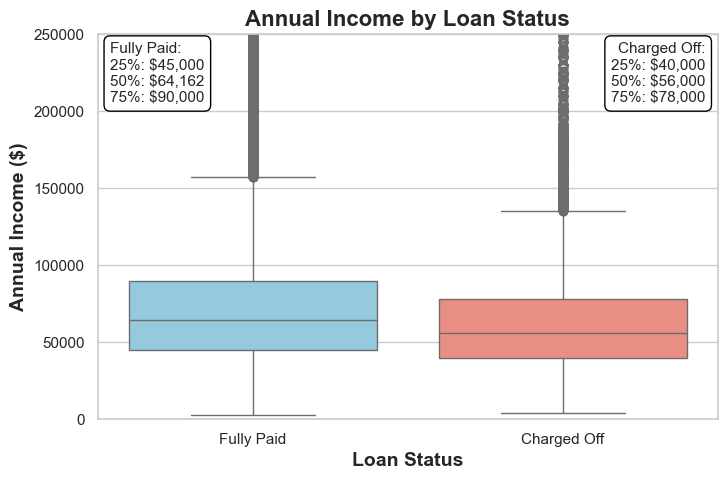

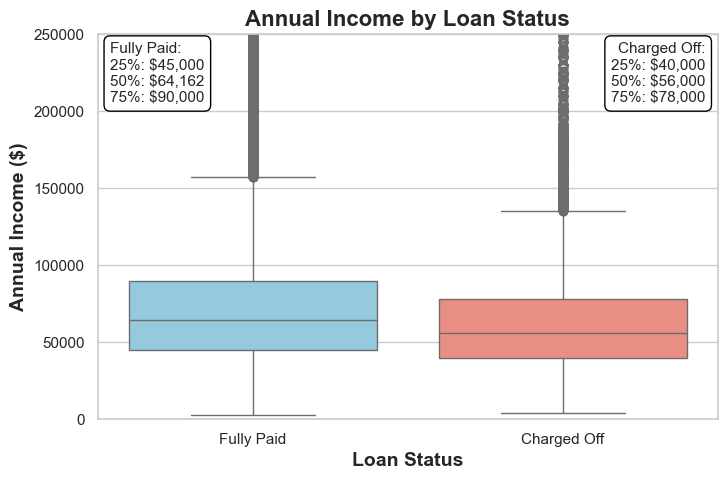

In [23]:
plt.figure(figsize=(8,5))

# Boxplot
sns.boxplot(x='loan_status', y='annual_inc', data=data, palette=["skyblue", "salmon"])

# Title and labels
plt.title("Annual Income by Loan Status", fontsize=16, fontweight='bold')
plt.xlabel("Loan Status", fontsize=14, fontweight='bold')
plt.ylabel("Annual Income ($)", fontsize=14, fontweight='bold')
plt.ylim(0, 250000)  # focus on main range

# Compute Q1, Median, Q3 for each loan_status
stats = data.groupby("loan_status")["annual_inc"].quantile([0.25, 0.5, 0.75]).unstack()

# Top-left box for Fully Paid
plt.text(
    0.02, 0.98,  # axes coordinates (left margin, top)
    f"Fully Paid:\n25%: ${stats.loc['Fully Paid',0.25]:,.0f}\n"
    f"50%: ${stats.loc['Fully Paid',0.50]:,.0f}\n"
    f"75%: ${stats.loc['Fully Paid',0.75]:,.0f}",
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='top',
    horizontalalignment='left',
    bbox=dict(boxstyle="round,pad=0.4", facecolor="white", edgecolor="black")
)

# Top-right box for Charged Off
plt.text(
    0.98, 0.98,  # axes coordinates (right margin, top)
    f"Charged Off:\n25%: ${stats.loc['Charged Off',0.25]:,.0f}\n"
    f"50%: ${stats.loc['Charged Off',0.50]:,.0f}\n"
    f"75%: ${stats.loc['Charged Off',0.75]:,.0f}",
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(boxstyle="round,pad=0.4", facecolor="white", edgecolor="black")
)
plt.show()
#plt.savefig("Desktop/Python/plots/Income_2.png", dpi=300, bbox_inches='tight')
#plt.close()

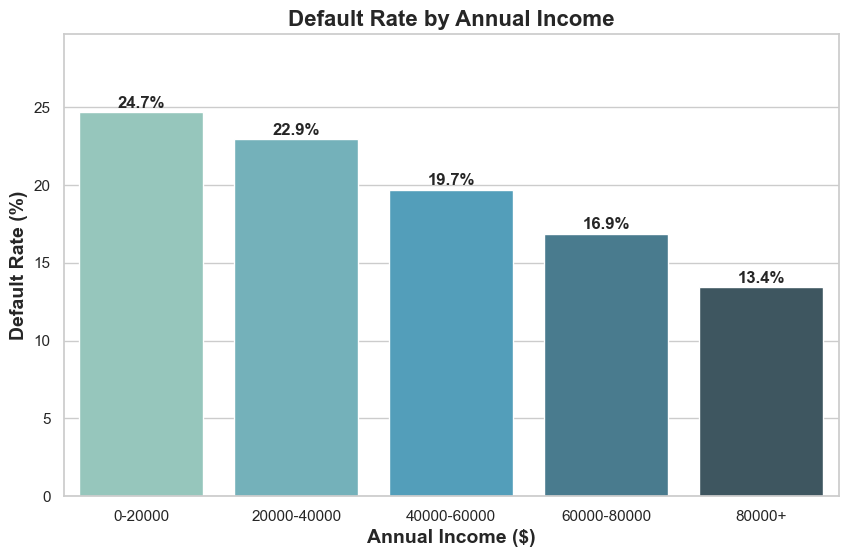

In [28]:
# Step 1: Create income bins with your ranges
bins = [0, 20000, 40000, 60000, 80000, 1000000]
labels = ['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000+']
data['income_bin'] = pd.cut(data['annual_inc'], bins=bins, labels=labels, include_lowest=True)

# Step 2: Compute default rate per bin
default_by_income = data.groupby('income_bin')['loan_status'].apply(lambda x: (x=='Charged Off').mean()*100).reset_index()
default_by_income.rename(columns={'loan_status': 'default_rate'}, inplace=True)

# Step 3: Plot default rate
plt.figure(figsize=(10,6))
ax = sns.barplot(x='income_bin', y='default_rate', data=default_by_income, palette='GnBu_d')

# Add percentage labels on bars
for i, val in enumerate(default_by_income['default_rate']):
    ax.text(i, val + 0.3, f"{val:.1f}%", ha='center', fontweight='bold', fontsize=12)

# Titles and labels
ax.set_title('Default Rate by Annual Income', fontsize=16, fontweight='bold')
ax.set_xlabel('Annual Income ($)', fontsize=14, fontweight='bold')
ax.set_ylabel('Default Rate (%)', fontsize=14, fontweight='bold')
plt.ylim(0, default_by_income['default_rate'].max() + 5)

plt.show()
#plt.savefig("Desktop/Python/plots/Income_3.png", dpi=300, bbox_inches='tight')
#plt.close()


# DTI (Debt-to-Income ratio) 
measures the percentage of a borrower’s monthly income that goes toward paying existing debts. A higher DTI indicates that a borrower is more financially stretched.

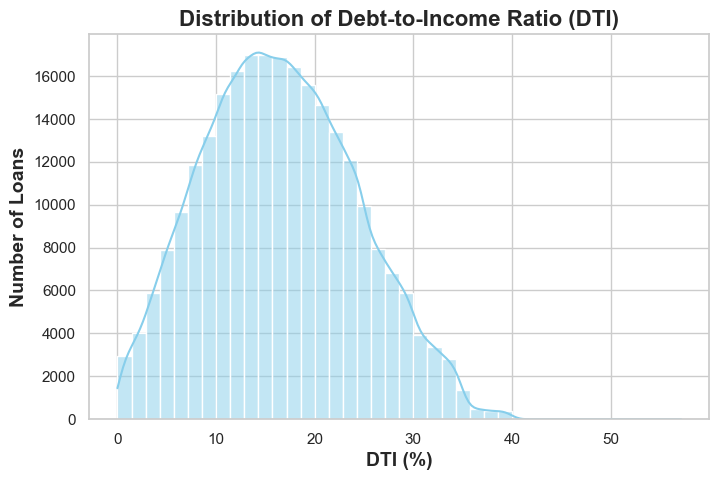

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(data['dti'], bins=40, kde=True, color="skyblue")
plt.title("Distribution of Debt-to-Income Ratio (DTI)", fontsize=16, fontweight='bold')
plt.xlabel("DTI (%)", fontsize=14, fontweight='bold')
plt.ylabel("Number of Loans", fontsize=14, fontweight='bold')

plt.show()




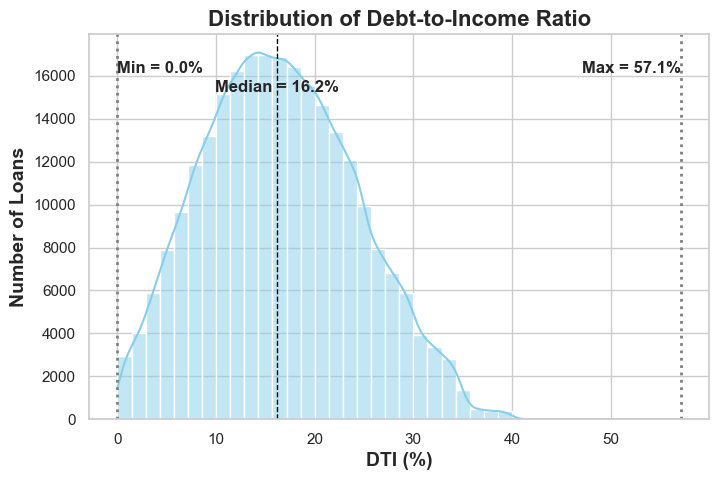

In [30]:
# Get stats
min_dti = data['dti'].min()
median_dti = data['dti'].median()
max_dti = data['dti'].max()

plt.figure(figsize=(8,5))
ax = sns.histplot(data['dti'], bins=40, kde=True, color="skyblue")

# Add vertical lines
plt.axvline(min_dti, color='gray', linestyle=':', linewidth=2)
plt.axvline(median_dti, color='black', linestyle='--', linewidth=1)  # thin median line
plt.axvline(max_dti, color='gray', linestyle=':', linewidth=2)

# Add labels
y_max = plt.ylim()[1]

plt.text(min_dti, y_max*0.9, f"Min = {min_dti:.1f}%", 
         ha='left', fontweight='bold', fontsize=12)

plt.text(median_dti, y_max*0.85, f"Median = {median_dti:.1f}%", 
         ha='center', fontweight='bold', fontsize=12)

plt.text(max_dti, y_max*0.9, f"Max = {max_dti:.1f}%", 
         ha='right', fontweight='bold', fontsize=12)

# Titles and labels
plt.title("Distribution of Debt-to-Income Ratio", fontsize=16, fontweight='bold')
plt.xlabel("DTI (%)", fontsize=14, fontweight='bold')
plt.ylabel("Number of Loans", fontsize=14, fontweight='bold')

plt.show()

#plt.savefig("Desktop/Python/plots/DTI_1.png", dpi=300, bbox_inches='tight')
#plt.close()

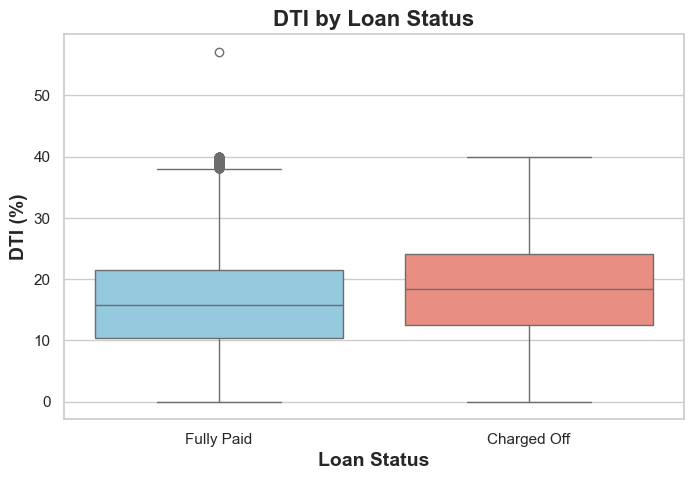

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(x='loan_status', y='dti', data=data, palette=["skyblue", "salmon"])
plt.title("DTI by Loan Status", fontsize=16, fontweight='bold')
plt.xlabel("Loan Status", fontsize=14, fontweight='bold')
plt.ylabel("DTI (%)", fontsize=14, fontweight='bold')
plt.show()


#plt.savefig("Desktop/Python/plots/DTI_2.png", dpi=300, bbox_inches='tight')
#plt.close()

In [35]:
# Create DTI bins
data['dti_bin'] = pd.cut(
    data['dti'],
    bins=[0, 5, 10, 15, 20, 25, 30, 40],
    labels=["5-10","10-15","15-20","20-25","25-30","30-35","35-40"]
)

# Calculate default rate per bin
dti_default = data.groupby('dti_bin')['loan_status'].apply(lambda x: (x=='Charged Off').mean()*100)

# Plot
plt.figure(figsize=(9,5))
ax = sns.barplot(x=dti_default.index, y=dti_default.values, palette=["#AED6F1"]*8)

# Add % labels
for i, val in enumerate(dti_default.values):
    ax.text(i, val + 1, f"{val:.1f}%", ha='center', fontweight='bold')

plt.title("Default Rate by DTI Range", fontsize=16, fontweight='bold')
plt.xlabel("DTI Range (%)", fontsize=14, fontweight='bold')
plt.ylabel("Default Rate (%)", fontsize=14, fontweight='bold')
plt.ylim(0, max(dti_default.values)+5)
plt.show()

#plt.savefig("Desktop/Python/plots/DTI_3.png", dpi=300, bbox_inches='tight')
#plt.close()

In [34]:
charged_off = data[data['loan_status'] == 'Charged Off']
dti_description = charged_off['dti'].describe()
dti_description

count   45248.00
mean       18.40
std         7.94
min         0.00
25%        12.57
50%        18.35
75%        24.09
max        39.98
Name: dti, dtype: float64

# Revolving Balance (revol_bal):

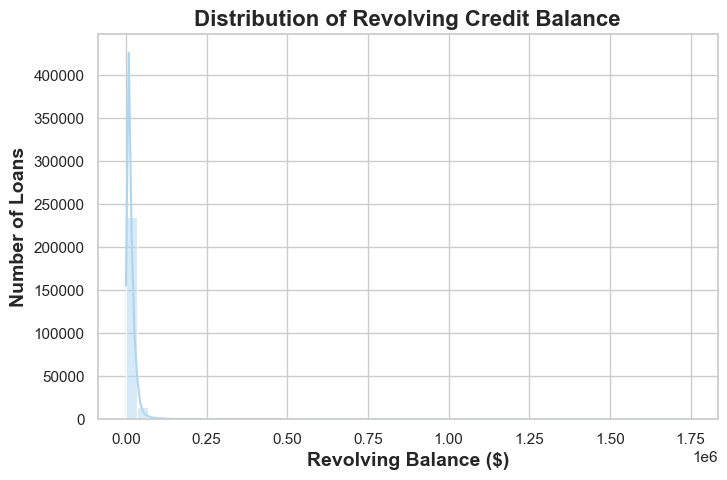

In [33]:
plt.figure(figsize=(8,5))
sns.histplot(data['revol_bal'], bins=50, kde=True, color="#AED6F1")
plt.title("Distribution of Revolving Credit Balance", fontsize=16, fontweight='bold')
plt.xlabel("Revolving Balance ($)", fontsize=14, fontweight='bold')
plt.ylabel("Number of Loans", fontsize=14, fontweight='bold')
plt.show()


In [34]:
data['revol_bal'].describe()

count    252971.00
mean      15167.98
std       18743.00
min           0.00
25%        5862.00
50%       10937.00
75%       19066.50
max     1746716.00
Name: revol_bal, dtype: float64

99th percentile cutoff: 78689.49999999994


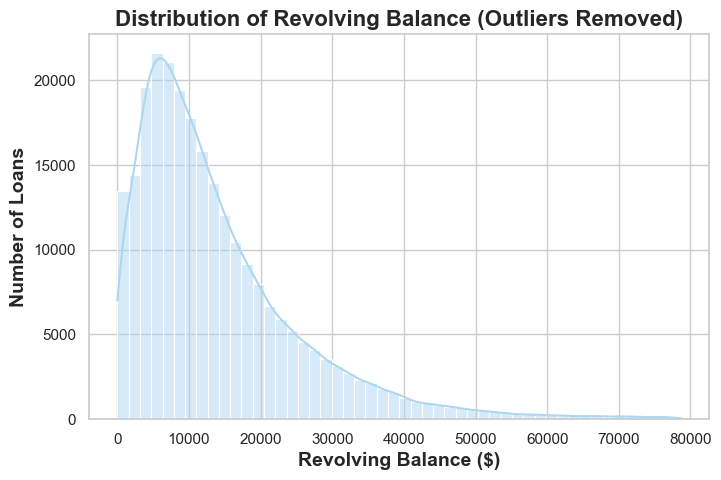

In [35]:
# Calculate 99th percentile
upper_limit = data['revol_bal'].quantile(0.99)

# Filter data
revol_bal_filtered = data[data['revol_bal'] <= upper_limit]

print("99th percentile cutoff:", upper_limit)
plt.figure(figsize=(8,5))
sns.histplot(revol_bal_filtered['revol_bal'], bins=50, kde=True, color="#AED6F1")

plt.title("Distribution of Revolving Balance (Outliers Removed)", fontsize=16, fontweight='bold')
plt.xlabel("Revolving Balance ($)", fontsize=14, fontweight='bold')
plt.ylabel("Number of Loans", fontsize=14, fontweight='bold')

plt.show()


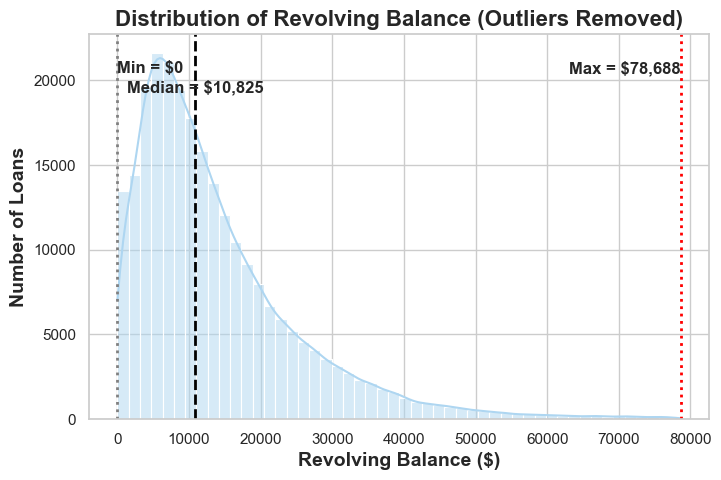

In [36]:
# 99th percentile cutoff
upper_limit = data['revol_bal'].quantile(0.99)
revol_bal_filtered = data[data['revol_bal'] <= upper_limit]

# Stats on filtered data
min_val = revol_bal_filtered['revol_bal'].min()
median_val = revol_bal_filtered['revol_bal'].median()
max_val = revol_bal_filtered['revol_bal'].max()

plt.figure(figsize=(8,5))
ax = sns.histplot(revol_bal_filtered['revol_bal'], bins=50, kde=True, color="#AED6F1")

# Add vertical lines
plt.axvline(min_val, color='gray', linestyle=':', linewidth=2)
plt.axvline(median_val, color='black', linestyle='--', linewidth=2)
plt.axvline(max_val, color='red', linestyle=':', linewidth=2)

# Add labels
y_max = plt.ylim()[1]
plt.text(min_val, y_max*0.9, f"Min = ${min_val:,.0f}", ha='left', fontweight='bold', fontsize=12)
plt.text(median_val, y_max*0.85, f"Median = ${median_val:,.0f}", ha='center', fontweight='bold', fontsize=12)
plt.text(max_val, y_max*0.9, f"Max = ${max_val:,.0f}", ha='right', fontweight='bold', fontsize=12)

# Titles and labels
plt.title("Distribution of Revolving Balance (Outliers Removed)", fontsize=16, fontweight='bold')
plt.xlabel("Revolving Balance ($)", fontsize=14, fontweight='bold')
plt.ylabel("Number of Loans", fontsize=14, fontweight='bold')

plt.show()


In [37]:
# 99th percentile cutoff
upper_limit = data['revol_bal'].quantile(0.99)

# Filtered data
revol_bal_filtered = data[data['revol_bal'] <= upper_limit]

plt.figure(figsize=(8,5))
sns.boxplot(x='loan_status', y='revol_bal', data=revol_bal_filtered, palette=["skyblue", "salmon"])

plt.title("Revolving Balance by Loan Status", fontsize=16, fontweight='bold')
plt.xlabel("Loan Status", fontsize=14, fontweight='bold')
plt.ylabel("Revolving Balance ($)", fontsize=14, fontweight='bold')
#plt.show()

plt.savefig("Desktop/Python/plots/Revol_1.png", dpi=300, bbox_inches='tight')
plt.close()

# 3.2 Revolving Utilization (revol_util) 

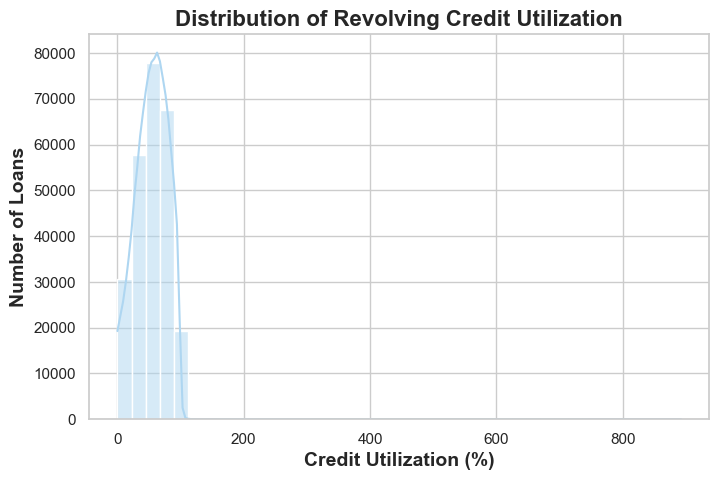

In [38]:
plt.figure(figsize=(8,5))
sns.histplot(data['revol_util'], bins=40, kde=True, color="#AED6F1")
plt.title("Distribution of Revolving Credit Utilization", fontsize=16, fontweight='bold')
plt.xlabel("Credit Utilization (%)", fontsize=14, fontweight='bold')
plt.ylabel("Number of Loans", fontsize=14, fontweight='bold')
plt.show()


In [39]:
data['revol_util'].describe()

count   252772.00
mean        54.31
std         24.79
min          0.00
25%         36.30
50%         55.80
75%         73.90
max        892.30
Name: revol_util, dtype: float64

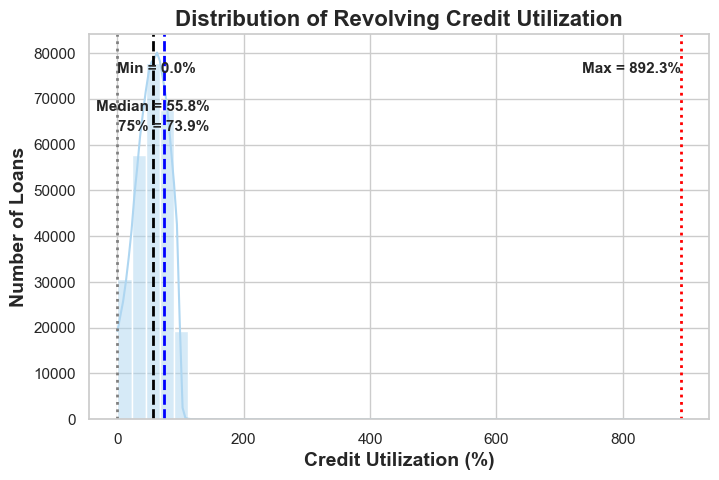

In [40]:
# Use provided descriptive stats
min_val = 0.0
median_val = 55.80
q75_val = 73.90
max_val = 892.30

plt.figure(figsize=(8,5))
sns.histplot(data['revol_util'], bins=40, kde=True, color="#AED6F1")

# Add vertical lines
plt.axvline(min_val, color='gray', linestyle=':', linewidth=2)
plt.axvline(median_val, color='black', linestyle='--', linewidth=2)
plt.axvline(q75_val, color='blue', linestyle='--', linewidth=2)
plt.axvline(max_val, color='red', linestyle=':', linewidth=2)

# Add labels
y_max = plt.ylim()[1]
plt.text(min_val, y_max*0.9, f"Min = {min_val:.1f}%", ha='left', fontweight='bold', fontsize=11)
plt.text(median_val, y_max*0.8, f"Median = {median_val:.1f}%", ha='center', fontweight='bold', fontsize=11)
plt.text(q75_val, y_max*0.75, f"75% = {q75_val:.1f}%", ha='center', fontweight='bold', fontsize=11)
plt.text(max_val, y_max*0.9, f"Max = {max_val:.1f}%", ha='right', fontweight='bold', fontsize=11)

# Titles and labels
plt.title("Distribution of Revolving Credit Utilization", fontsize=16, fontweight='bold')
plt.xlabel("Credit Utilization (%)", fontsize=14, fontweight='bold')
plt.ylabel("Number of Loans", fontsize=14, fontweight='bold')
plt.show()


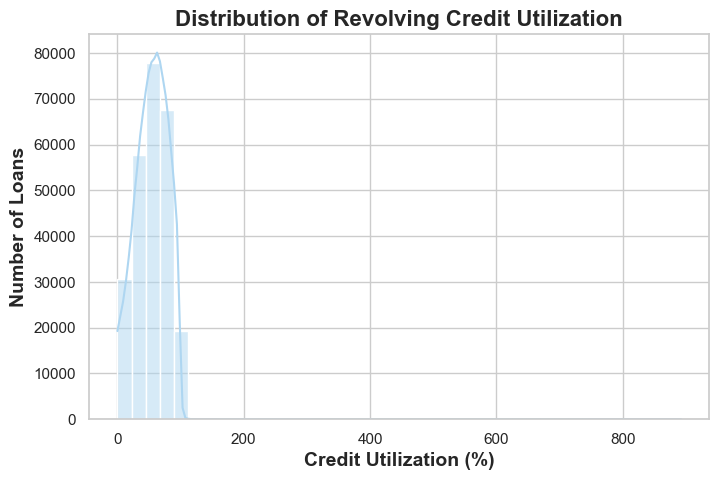

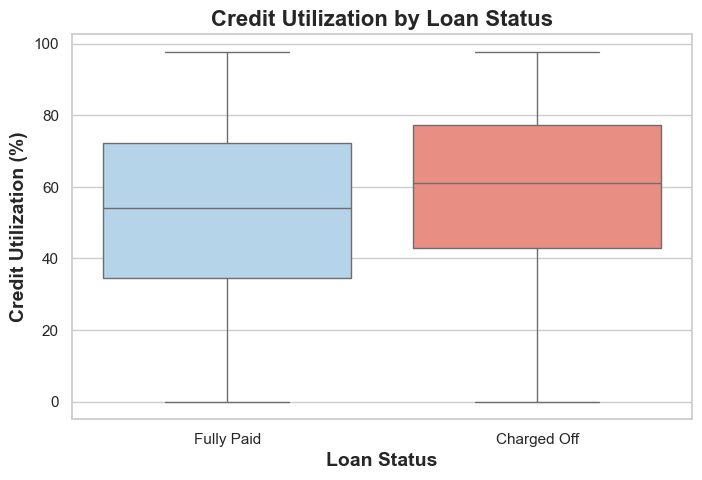

In [25]:
# Remove extreme outliers for boxplot (above 99th percentile)
upper_limit = data['revol_util'].quantile(0.99)
revol_util_box = data[data['revol_util'] <= upper_limit]

plt.figure(figsize=(8,5))
sns.boxplot(x='loan_status', y='revol_util', data=revol_util_box, palette=["#AED6F1", "salmon"])

plt.title("Credit Utilization by Loan Status", fontsize=16, fontweight='bold')
plt.xlabel("Loan Status", fontsize=14, fontweight='bold')
plt.ylabel("Credit Utilization (%)", fontsize=14, fontweight='bold')
plt.show()

#plt.savefig("Desktop/Python/plots/Revol_2.png", dpi=300, bbox_inches='tight')
#plt.close()

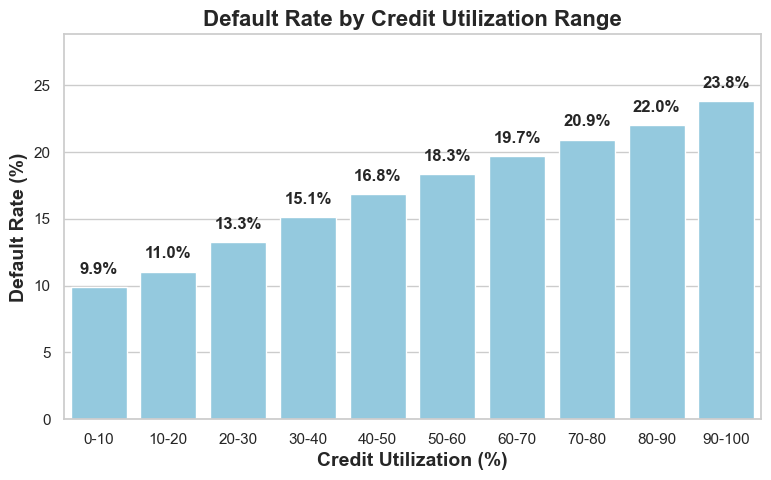

In [26]:
# Bin utilization
data['util_bin'] = pd.cut(
    data['revol_util'],
    bins=[0,10,20,30,40,50,60,70,80,90,100],
    labels=["0-10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80-90","90-100"]
)

util_default = data.groupby('util_bin')['loan_status'].apply(lambda x: (x=='Charged Off').mean()*100)

plt.figure(figsize=(9,5))
ax = sns.barplot(x=util_default.index, y=util_default.values, palette=["skyblue"]*10)

for i, v in enumerate(util_default.values):
    ax.text(i, v+1, f"{v:.1f}%", ha='center', fontweight='bold')

plt.title("Default Rate by Credit Utilization Range", fontsize=16, fontweight='bold')
plt.xlabel("Credit Utilization (%)", fontsize=14, fontweight='bold')
plt.ylabel("Default Rate (%)", fontsize=14, fontweight='bold')
plt.ylim(0, max(util_default.values)+5)

plt.show()

#plt.savefig("Desktop/Python/plots/Revol_3.png", dpi=300, bbox_inches='tight')
#plt.close()

# Section 4: Credit History / Borrower Behavior:

4.1 Grade: loan risk ratings assigned by Lending Club. These are categorical variables and are very useful to see how default risk varies by risk grade.

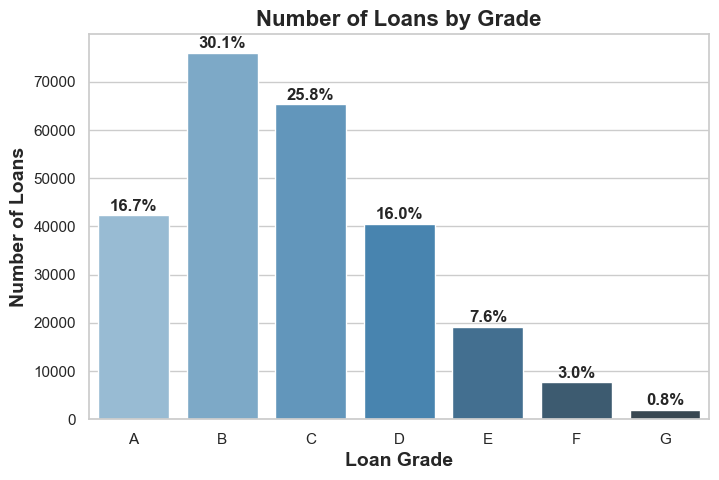

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
grade_counts = data['grade'].value_counts().sort_index()
ax = sns.barplot(x=grade_counts.index, y=grade_counts.values, palette="Blues_d")

# Add % labels over bars
total = grade_counts.sum()
for i, val in enumerate(grade_counts.values):
    ax.text(i, val + 1000, f"{val/total*100:.1f}%", ha='center', fontweight='bold')

plt.title("Number of Loans by Grade", fontsize=16, fontweight='bold')
plt.xlabel("Loan Grade", fontsize=14, fontweight='bold')
plt.ylabel("Number of Loans", fontsize=14, fontweight='bold')
plt.show()

#plt.savefig("Desktop/Python/plots/Grade_1.png", dpi=300, bbox_inches='tight')
#plt.close()

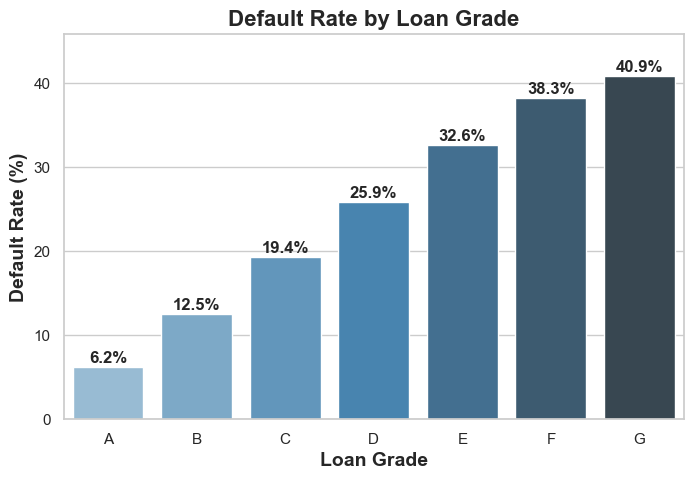

In [28]:
grade_default = data.groupby('grade')['loan_status'].apply(lambda x: (x=='Charged Off').mean()*100)

plt.figure(figsize=(8,5))
ax = sns.barplot(x=grade_default.index, y=grade_default.values, palette="Blues_d")

# Add % labels
for i, val in enumerate(grade_default.values):
    ax.text(i, val + 0.5, f"{val:.1f}%", ha='center', fontweight='bold')

plt.title("Default Rate by Loan Grade", fontsize=16, fontweight='bold')
plt.xlabel("Loan Grade", fontsize=14, fontweight='bold')
plt.ylabel("Default Rate (%)", fontsize=14, fontweight='bold')
plt.ylim(0, max(grade_default.values)+5)


plt.show()

#plt.savefig("Desktop/Python/plots/Grade_2.png", dpi=300, bbox_inches='tight')
#plt.close()

# earliest_cr_line: Credit age

Borrowers with longer credit histories generally have better credit experience and are less likely to default.

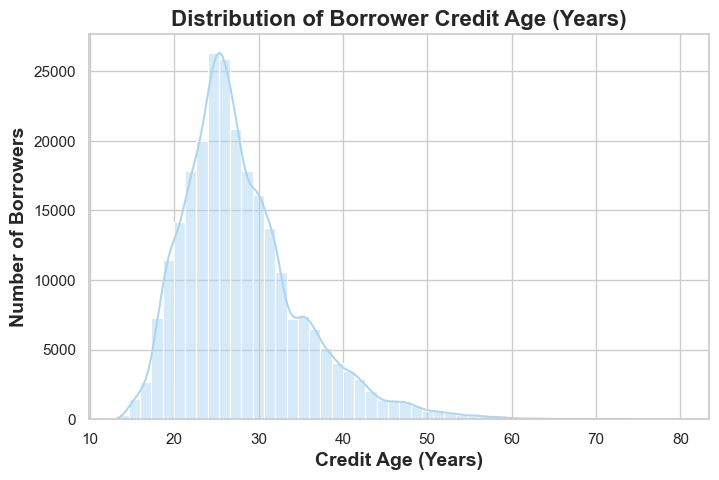

In [29]:
import pandas as pd

# Convert to datetime
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'], errors='coerce')

# Calculate credit age in years
data['credit_age_yrs'] = (pd.to_datetime('today') - data['earliest_cr_line']).dt.days / 365
plt.figure(figsize=(8,5))
sns.histplot(data['credit_age_yrs'], bins=50, kde=True, color="#AED6F1")
plt.title("Distribution of Borrower Credit Age (Years)", fontsize=16, fontweight='bold')
plt.xlabel("Credit Age (Years)", fontsize=14, fontweight='bold')
plt.ylabel("Number of Borrowers", fontsize=14, fontweight='bold')
plt.show()


In [30]:
data['credit_age_yrs'].describe()

count   252971.00
mean        27.95
std          6.99
min         13.28
25%         23.28
50%         26.62
75%         31.37
max         80.07
Name: credit_age_yrs, dtype: float64

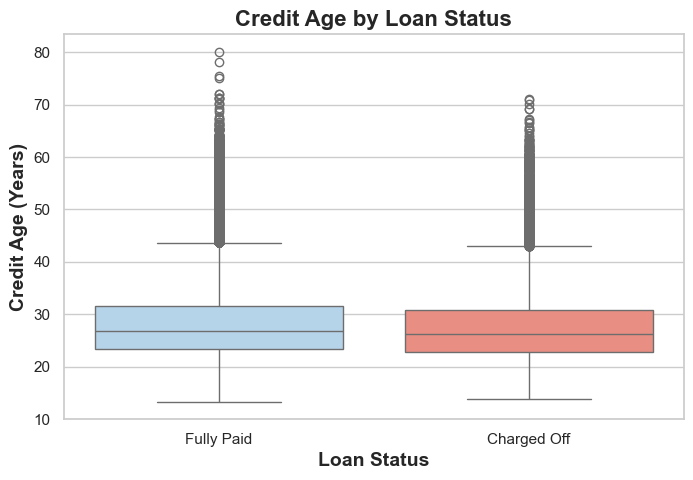

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(x='loan_status', y='credit_age_yrs', data=data, palette=["#AED6F1", "salmon"])
plt.title("Credit Age by Loan Status", fontsize=16, fontweight='bold')
plt.xlabel("Loan Status", fontsize=14, fontweight='bold')
plt.ylabel("Credit Age (Years)", fontsize=14, fontweight='bold')
plt.show()


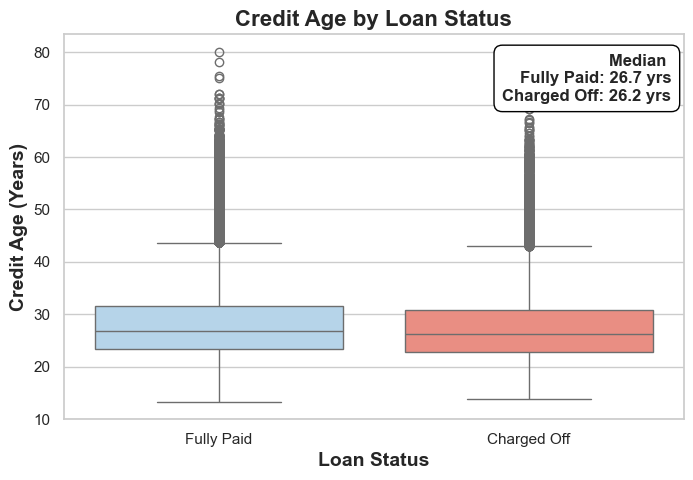

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x='loan_status', y='credit_age_yrs', data=data, palette=["#AED6F1", "salmon"])

plt.title("Credit Age by Loan Status", fontsize=16, fontweight='bold')
plt.xlabel("Loan Status", fontsize=14, fontweight='bold')
plt.ylabel("Credit Age (Years)", fontsize=14, fontweight='bold')

# Calculate median for each loan status
medians = data.groupby('loan_status')['credit_age_yrs'].median()

# Add a legend-style box in top-right
stats_text = f"Median \nFully Paid: {medians['Fully Paid']:.1f} yrs\nCharged Off: {medians['Charged Off']:.1f} yrs"
plt.gca().text(
    0.98, 0.95, stats_text,
    horizontalalignment='right',
    verticalalignment='top',
    transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'),
    fontsize=12,
    fontweight='bold'
)

plt.show()


# Section 5: Borrower Demographics/employmment

<Figure size 800x500 with 0 Axes>

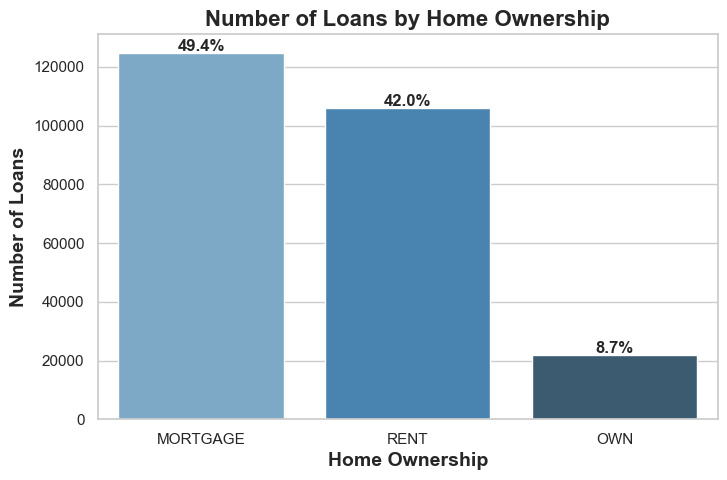

In [34]:
# Replace OTHER, NONE, ANY, and NaN with RENT
data['home_ownership_clean'] = data['home_ownership'].replace(
    {'OTHER': 'RENT', 'NONE': 'RENT', 'ANY': 'RENT'}
).fillna('RENT')

# Only keep the three categories for plotting
data['home_ownership_clean'] = data['home_ownership_clean'].where(
    data['home_ownership_clean'].isin(['MORTGAGE', 'RENT', 'OWN'])
)

# Count
home_counts = data['home_ownership_clean'].value_counts()

plt.figure(figsize=(8,5))
ax = sns.barplot(x=home_counts.index, y=home_counts.values, palette="Blues_d")

# Add % labels
total = home_counts.sum()
for i, val in enumerate(home_counts.values):
    ax.text(i, val + 500, f"{val/total*100:.1f}%", ha='center', fontweight='bold')

plt.title("Number of Loans by Home Ownership", fontsize=16, fontweight='bold')
plt.xlabel("Home Ownership", fontsize=14, fontweight='bold')
plt.ylabel("Number of Loans", fontsize=14, fontweight='bold')
plt.show()

#plt.savefig("Desktop/Python/plots/Home_1.png", dpi=300, bbox_inches='tight')
#plt.close()

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count
home_counts = data['home_ownership_clean'].value_counts()
total = home_counts.sum()

# Get the same Blues_d palette
palette = sns.color_palette("Blues_d", n_colors=3)  # 3 bars: MORTGAGE, RENT, OWN

# Assign colors explicitly so RENT matches the second plot
color_dict = {
    'MORTGAGE': palette[0],
    'RENT': palette[2],  # same as second plot
    'OWN': palette[1]
}
bar_colors = [color_dict[x] for x in home_counts.index]

plt.figure(figsize=(8,5))
ax = sns.barplot(x=home_counts.index, y=home_counts.values, palette=bar_colors)

# Add % labels
for i, val in enumerate(home_counts.values):
    ax.text(i, val + 500, f"{val/total*100:.1f}%", ha='center', fontweight='bold')

plt.title("Number of Loans by Home Ownership", fontsize=16, fontweight='bold')
plt.xlabel("Home Ownership", fontsize=14, fontweight='bold')
plt.ylabel("Number of Loans", fontsize=14, fontweight='bold')

plt.savefig("Desktop/Python/plots/Home_1.png", dpi=300, bbox_inches='tight')
plt.close()

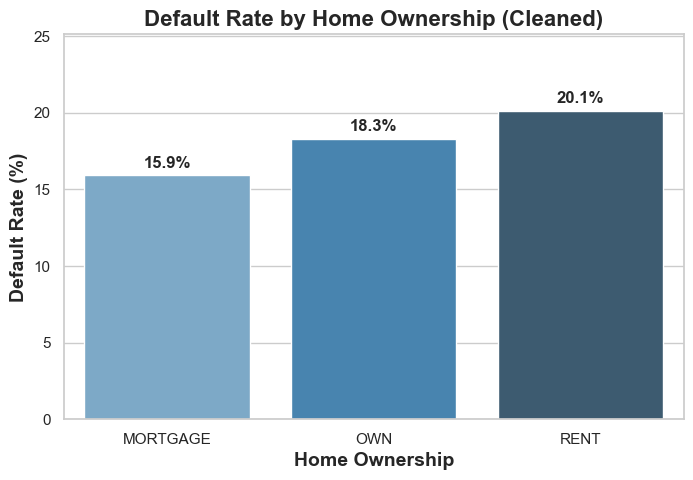

In [36]:
home_default = data.groupby('home_ownership_clean')['loan_status'].apply(lambda x: (x=='Charged Off').mean()*100)

plt.figure(figsize=(8,5))
ax = sns.barplot(x=home_default.index, y=home_default.values, palette="Blues_d")

# Add % labels
for i, val in enumerate(home_default.values):
    ax.text(i, val + 0.5, f"{val:.1f}%", ha='center', fontweight='bold')

plt.title("Default Rate by Home Ownership (Cleaned)", fontsize=16, fontweight='bold')
plt.xlabel("Home Ownership", fontsize=14, fontweight='bold')
plt.ylabel("Default Rate (%)", fontsize=14, fontweight='bold')
plt.ylim(0, max(home_default.values)+5)
plt.show()

#plt.savefig("Desktop/Python/plots/Home_2.png", dpi=300, bbox_inches='tight')
#plt.close()

# purpose of Loan

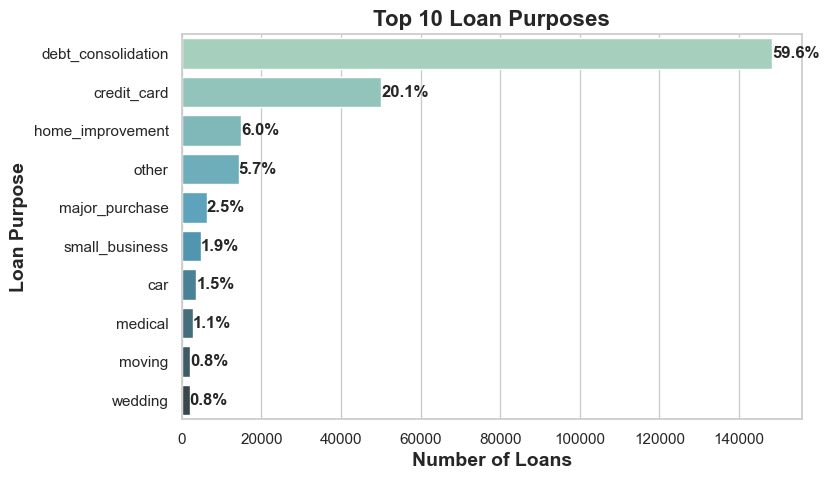

In [37]:
plt.figure(figsize=(8,5))

# Get top 10 purposes by frequency
top10 = data['purpose'].value_counts().nlargest(10).index

# Filter data for top 10 purposes
df_top10 = data[data['purpose'].isin(top10)]

# Countplot
ax = sns.countplot(
    y="purpose", 
    data=df_top10, 
    palette='GnBu_d', 
    order=top10
)

# Add % labels on bars
total = len(df_top10)
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 10, p.get_y() + p.get_height()/2, f'{(width/total*100):.1f}%', 
            va='center', fontweight='bold', fontsize=12)

# Titles and labels
ax.set_title('Top 10 Loan Purposes', fontsize=16, fontweight='bold')
ax.set_xlabel('Number of Loans', fontsize=14, fontweight='bold')
ax.set_ylabel('Loan Purpose', fontsize=14, fontweight='bold')

plt.show()

#plt.savefig("Desktop/Python/plots/purpose_1.png", dpi=300, bbox_inches='tight')
#plt.close()

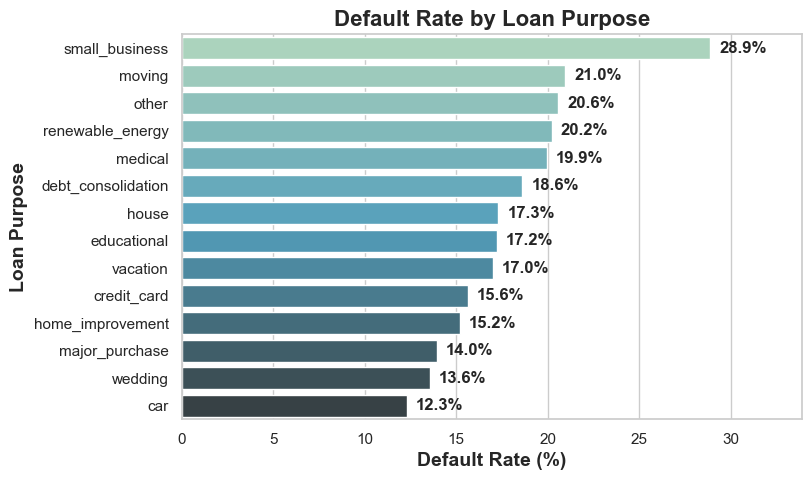

In [38]:
# Calculate default rate by purpose
purpose_default = data.groupby('purpose')['loan_status'].apply(lambda x: (x=='Charged Off').mean()*100).sort_values(ascending=False)

plt.figure(figsize=(8,5))
ax = sns.barplot(x=purpose_default.values, y=purpose_default.index, palette="GnBu_d")

# Add % labels on bars
for i, val in enumerate(purpose_default.values):
    ax.text(val + 0.5, i, f"{val:.1f}%", va='center', fontweight='bold', fontsize=12)

# Titles and labels
ax.set_title("Default Rate by Loan Purpose", fontsize=16, fontweight='bold')
ax.set_xlabel("Default Rate (%)", fontsize=14, fontweight='bold')
ax.set_ylabel("Loan Purpose", fontsize=14, fontweight='bold')

# Set x-limit slightly beyond max for labels
plt.xlim(0, purpose_default.values.max() + 5)

plt.show()


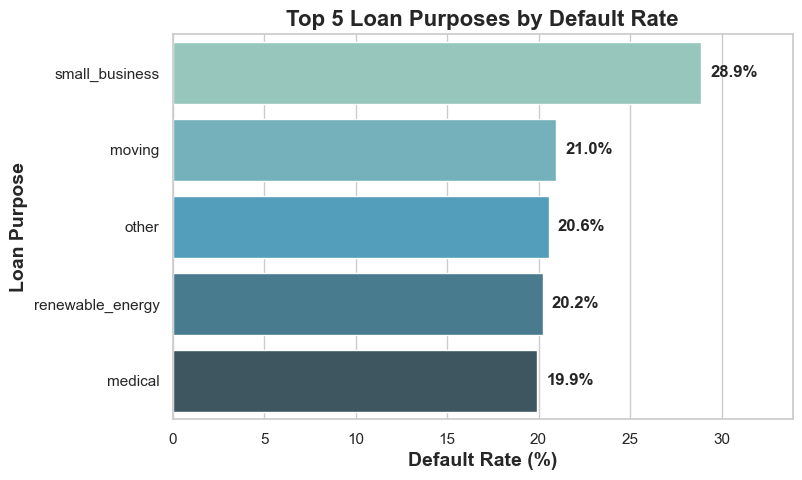

In [39]:
# Calculate default rate by purpose
purpose_default = data.groupby('purpose')['loan_status'].apply(lambda x: (x=='Charged Off').mean()*100)

# Get top 5 purposes by default rate
top5_default_purpose = purpose_default.sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
ax = sns.barplot(x=top5_default_purpose.values, y=top5_default_purpose.index, palette="GnBu_d")

# Add % labels on bars
for i, val in enumerate(top5_default_purpose.values):
    ax.text(val + 0.5, i, f"{val:.1f}%", va='center', fontweight='bold', fontsize=12)

# Titles and labels
ax.set_title("Top 5 Loan Purposes by Default Rate", fontsize=16, fontweight='bold')
ax.set_xlabel("Default Rate (%)", fontsize=14, fontweight='bold')
ax.set_ylabel("Loan Purpose", fontsize=14, fontweight='bold')

# Set x-limit slightly beyond max for labels
plt.xlim(0, top5_default_purpose.values.max() + 5)

plt.show()

#plt.savefig("Desktop/Python/plots/Home_2.png", dpi=300, bbox_inches='tight')
#plt.close()


# Relationship among variables

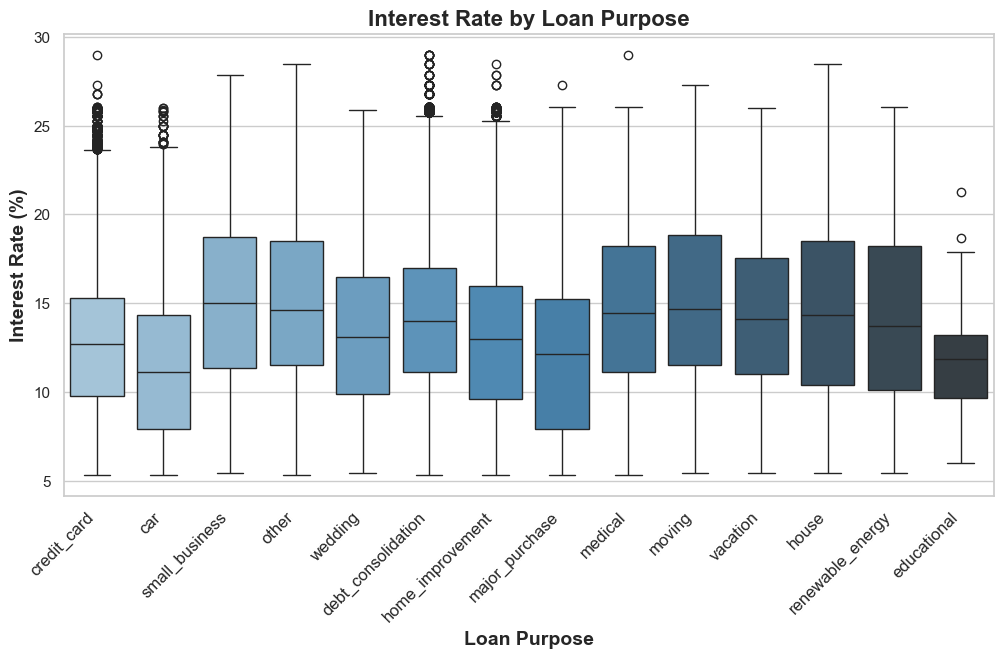

In [40]:
plt.figure(figsize=(12,6))
sns.boxplot(x='purpose', y='int_rate', data=data, palette="Blues_d")
plt.title("Interest Rate by Loan Purpose", fontsize=16, fontweight='bold')
plt.xlabel("Loan Purpose", fontsize=14, fontweight='bold')
plt.ylabel("Interest Rate (%)", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()


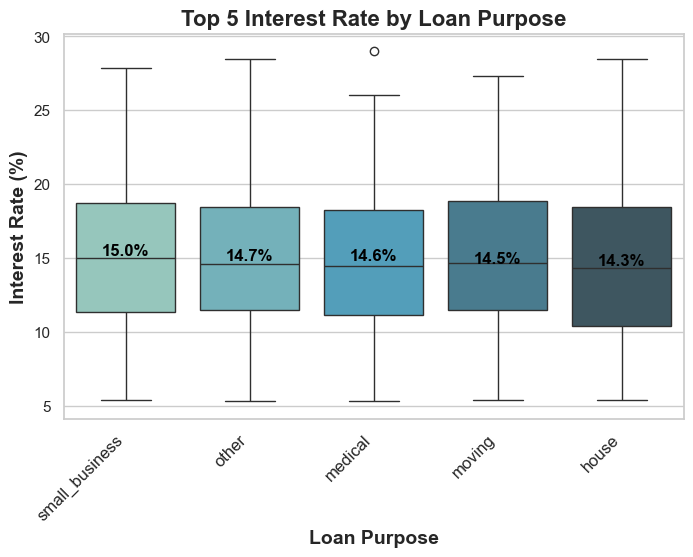

In [41]:
# Calculate median interest rate by purpose
median_int_by_purpose = data.groupby('purpose')['int_rate'].median().sort_values(ascending=False)

# Top 5 purposes by median interest rate
top5_median_int = median_int_by_purpose.head(5).index

# Filter data for top 5 purposes
data_top5 = data[data['purpose'].isin(top5_median_int)]

plt.figure(figsize=(8,5))

# Boxplot
sns.boxplot(
    x='purpose', 
    y='int_rate', 
    data=data_top5, 
    palette='GnBu_d'
)

# Titles and labels
plt.title('Top 5 Interest Rate by Loan Purpose', fontsize=16, fontweight='bold')
plt.xlabel('Loan Purpose', fontsize=14, fontweight='bold')
plt.ylabel('Interest Rate (%)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)

# Optionally, annotate median values on the plot
medians = data_top5.groupby('purpose')['int_rate'].median()
for i, purpose in enumerate(top5_median_int):
    plt.text(i, medians[purpose] + 0.2, f"{medians[purpose]:.1f}%", 
             ha='center', fontweight='bold', fontsize=12, color='black')

plt.show()
#plt.savefig("Desktop/Python/plots/Home_3.png", dpi=300, bbox_inches='tight')
#plt.close()

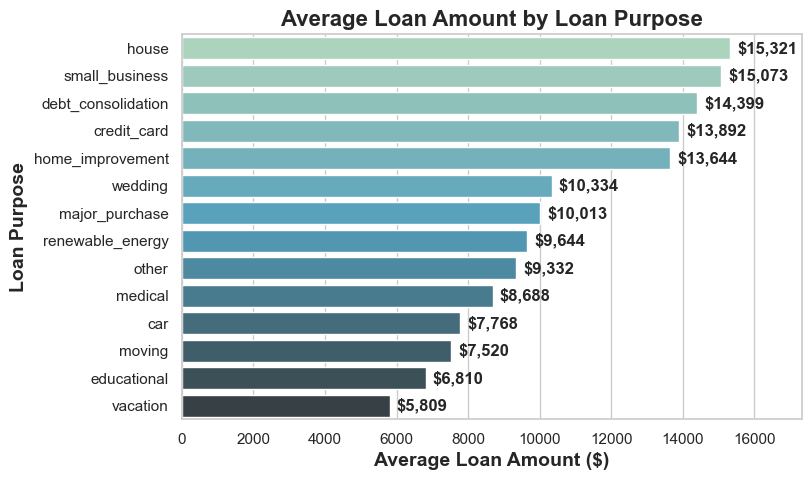

In [42]:
# Average loan amount by purpose
avg_loan = data.groupby('purpose')['loan_amnt'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
ax = sns.barplot(x=avg_loan.values, y=avg_loan.index, palette='GnBu_d')

# Add value labels
for i, val in enumerate(avg_loan.values):
    ax.text(val + 200, i, f"${val:,.0f}", va='center', fontweight='bold', fontsize=12)

# Titles and labels
ax.set_title('Average Loan Amount by Loan Purpose', fontsize=16, fontweight='bold')
ax.set_xlabel('Average Loan Amount ($)', fontsize=14, fontweight='bold')
ax.set_ylabel('Loan Purpose', fontsize=14, fontweight='bold')

# Adjust x-limit for label clarity
plt.xlim(0, avg_loan.values.max() + 2000)

plt.show()

#plt.savefig("Desktop/Python/plots/Home_4.png", dpi=300, bbox_inches='tight')
#plt.close()


# Loan Term VS Interest Rate 

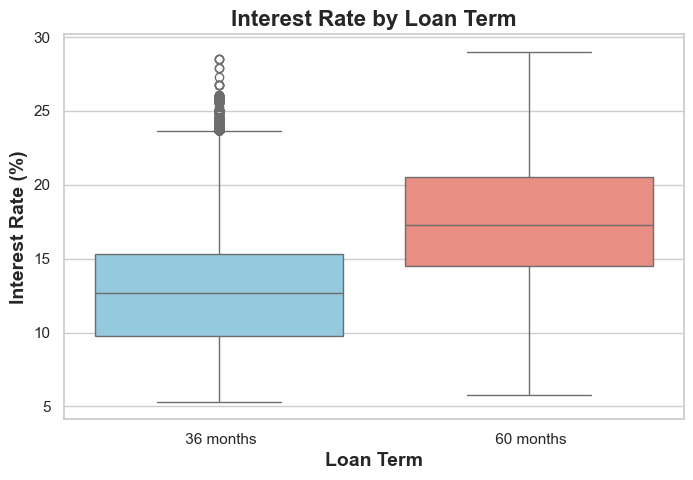

In [43]:
plt.figure(figsize=(8,5))

# Boxplot of interest rate by loan term
sns.boxplot(
    x='term',
    y='int_rate',
    data=data,
    palette=["skyblue", "salmon"]
)

# Titles and labels
plt.title('Interest Rate by Loan Term', fontsize=16, fontweight='bold')
plt.xlabel('Loan Term', fontsize=14, fontweight='bold')
plt.ylabel('Interest Rate (%)', fontsize=14, fontweight='bold')

plt.show()

#plt.savefig("Desktop/Python/plots/IR_T.png", dpi=300, bbox_inches='tight')
#plt.close()

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Make sure your 'data' DataFrame is loaded
# Example: data = pd.read_csv("lc_loan.csv")

# Strip spaces from 'term' to avoid lookup issues
data['term'] = data['term'].str.strip()

plt.figure(figsize=(8,5))

# Boxplot of interest rate by loan term
sns.boxplot(
    x='term',
    y='int_rate',
    data=data,
    palette=["skyblue", "salmon"]
)

# Titles and labels
plt.title('Interest Rate by Loan Term', fontsize=16, fontweight='bold')
plt.xlabel('Loan Term', fontsize=14, fontweight='bold')
plt.ylabel('Interest Rate (%)', fontsize=14, fontweight='bold')

# Compute 25%, 50%, 75% for each term
stats = data.groupby("term")["int_rate"].quantile([0.25, 0.5, 0.75]).unstack()

# Top-left legend box for 36 months
plt.text(
    0.02, 0.98,  # axes coordinates (left-top corner)
    f"36 months:\n25%: {stats.loc['36 months',0.25]:.2f}%\n"
    f"50%: {stats.loc['36 months',0.50]:.2f}%\n"
    f"75%: {stats.loc['36 months',0.75]:.2f}%",
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='top',
    horizontalalignment='left',
    bbox=dict(boxstyle="round,pad=0.4", facecolor="white", edgecolor="black")
)

# Top-right legend box for 60 months
plt.text(
    0.98, 0.98,  # axes coordinates (right-top corner)
    f"60 months:\n25%: {stats.loc['60 months',0.25]:.2f}%\n"
    f"50%: {stats.loc['60 months',0.50]:.2f}%\n"
    f"75%: {stats.loc['60 months',0.75]:.2f}%",
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(boxstyle="round,pad=0.4", facecolor="white", edgecolor="black")
)

#plt.show()
plt.savefig("Desktop/Python/plots/IRbyT.png", dpi=300, bbox_inches='tight')
plt.close()

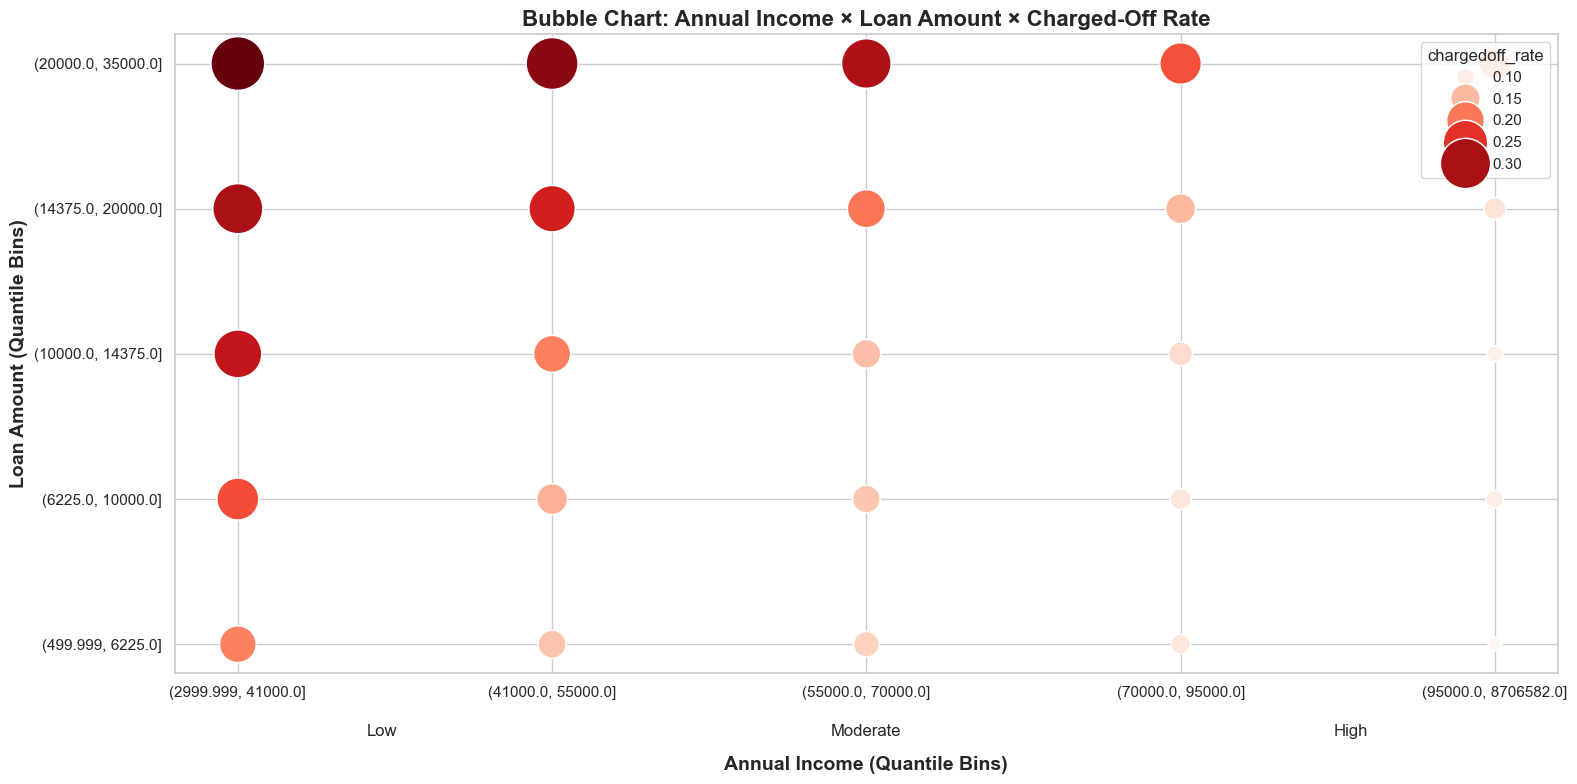

In [46]:
# 1. Create quantile bins for income & loan amount
data['inc_bin']  = pd.qcut(data['annual_inc'], 5, duplicates='drop')
data['loan_bin'] = pd.qcut(data['loan_amnt'], 5, duplicates='drop')

# 2. Compute charged-off proportion
grouped = (
    data.groupby(['inc_bin', 'loan_bin'])['loan_status']
         .apply(lambda x: (x == 'Charged Off').mean())
         .reset_index()
)

grouped.rename(columns={'loan_status': 'chargedoff_rate'}, inplace=True)

# Convert bins to strings for cleaner plotting
grouped['inc_bin']  = grouped['inc_bin'].astype(str)
grouped['loan_bin'] = grouped['loan_bin'].astype(str)

# 3. Bubble Chart
plt.figure(figsize=(16, 8))

sns.scatterplot(
    data=grouped,
    x='inc_bin',
    y='loan_bin',
    size='chargedoff_rate',
    hue='chargedoff_rate',
    palette='Reds',
    sizes=(100, 1500),
    legend=True
)

# Title
plt.title("Bubble Chart: Annual Income × Loan Amount × Charged-Off Rate", fontsize=16, fontweight='bold')

# X-axis tick labels horizontal
plt.xticks(rotation=0)

# Invert y-axis so low loan amounts are at bottom
plt.gca().invert_yaxis()

# Add custom income category labels BELOW the bins (using axes coordinates to avoid overlap)
ax = plt.gca()

plt.text(0.15, -0.08, "Low", fontsize=12, ha='center', va='top', transform=ax.transAxes)
plt.text(0.5, -0.08, "Moderate", fontsize=12, ha='center', va='top', transform=ax.transAxes)
plt.text(0.85, -0.08, "High", fontsize=12, ha='center', va='top', transform=ax.transAxes)

# Main x-axis label BELOW everything
plt.xlabel("Annual Income (Quantile Bins)", fontsize=14, fontweight='bold', labelpad=40)

# Y-axis
plt.ylabel("Loan Amount (Quantile Bins)", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()
